Multiple Myeloma data challenge
============================
Technical test for Data Scientist (DS) position in the Computational Biology team

Katarzyna Wreczycka 17.10.2022




Clinical context
-------------------
Multiple Myeloma (MM) is a type of bone marrow cancer. Treatment for MM involves
combinations of drugs over multiple cycles. There is huge heterogeneity in treatment
response with some individuals being non-responders and some patients remaining well for
some time before a relapse. A better characterization of patients who relapse early can
influence the treatment options and combinations.

In this test, we propose to develop a model for predicting the risk of dying or relapsing of
newly diagnosed multiple myeloma patients from baseline clinical and expression data.


Data
--------------------------
The data for this test are extracted from an old Synapse Dream Challenge
(https://www.synapse.org/#!Synapse:syn6187098/wiki/401884) .
It consists of clinical data, gene expression data and follow-up for newly diagnosed Multiple
Myeloma patients extracted from the MMRF CoMMpass IA9 study. In the data, newly
diagnosed MM patients are classified as High Risk (HR) when they relapse or die before 18
months.
To access the data, you first need to create an account and download the following files:
- Expression data:
MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_hg19.csv
(https://www.synapse.org/#!Synapse:syn10573789)
[notice that the first column gives Entrez IDs for genes]
- Clinical data and labels:
sc3_Training_ClinAnnotations.csv
(https://www.synapse.org/#!Synapse:syn9926878)
- Explanation of the clinical and label annotations:
Harmonized_Clinical_Dictionary
(https://www.synapse.org/#!Synapse:syn9744732)



Goal
--------------------------------------
The purpose of this technical test is to develop a model for predicting the risk of fast dying or
relapsing of newly diagnosed multiple myeloma patients (using the High Risk label
HR_FLAG).The evaluation will mostly rely on the way you approach the problem: pre-analysis,
preprocessing strategy, choice of modelization and coding skills.
The code should be developed so that the model can be applied to an external validation
dataset. You will send your code (Notebook or script) along with a small report to interpret
the model and put it in MM context (the use of the literature is clearly welcome).
Your model can be developed in Python or R with a small README to explain how to apply
it to external data.

You can use external knowledge/data to develop the model. Please add all the requirements
for libraries that should be installed to make it run.

If not used to survival analysis, the candidate can consider a simplified version in which it
can assumed that no censored patients will be present in the external validation dataset.

(Obvious) suggestion: OS and PFS related variables are also labels and not features:
HR_FLAG is defined as OS or PFS < 18 months (taking into account censoring).

--------------------------
-----------------------------

OS = overall survival

PFS = progression-free survival = The length of time during and after the treatment of a disease, such as cancer, that a patient lives with the disease but it does not get worse. In a clinical trial, measuring the progression-free survival is one way to see how well a new treatment works.

Censoring = a type of missing data problem unique to survival analysis. This happens when you track the sample/subject through the end of the study and the event never occurs. This could also happen due to the sample/subject dropping out of the study for reasons other than death, or some other loss to followup. The sample is censored in that you only know that the individual survived up to the loss to followup, but you don’t know anything about survival after tha


high risk = defined as disease progression or death prior to 18 months from diagnosis


in the publication (https://www.nature.com/articles/s41375-020-0742-z) they say something about 
https://blog.datadive.net/selecting-good-features-part-i-univariate-selection/
"The top-performing model implemented a wisdom of the crowd approach, utilizing clinical features and published myeloma signatures that summarize the expression of gene sets. The second-place “Stanford University Go” (SUGO) model instead included individual genes as features, utilizing a univariate-based feature selection approach to identify genes to include in their model"

(REE-laps) The return of a disease or the signs and symptoms of a disease after a period of improvement


expression data is TPM (transcripts per million).


The International Staging System (ISS) for multiple myeloma defines 3 subgroups with differing overall survival: Stage I- 62 months. Stage II- 44 months. Stage III- 29 months.



Results
-----------------------


In [1]:
# Load libraries

library(tidyverse);
library(data.table);
library(org.Hs.eg.db);
library(stats);

# visualization
library(ggfortify); 
library(ggplot2);

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘p

In [2]:
# load data
clinical_data = read.csv("./Harmonized_Clinical_Dictionary.csv", sep=",", header=TRUE,fill = TRUE, stringsAsFactors = FALSE)
expression_data = read.csv("./MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_hg19.csv", sep=",", header=TRUE,stringsAsFactors = FALSE,row.names=1)
annot_data = read.csv("./sc3_Training_ClinAnnotations.csv", sep=",", header=TRUE, stringsAsFactors = FALSE)

In [ ]:
# Convert the row names to entrez ids
#library("AnnotationDbi")
#library("org.Hs.eg.db")
#geneSymbols <- mapIds(org.Hs.eg.db, keys=rownames(expression_data), 
#                      column="SYMBOL", keytype="ENTREZID", 
#                      multiVals="first")
#head(geneSymbols)

In [33]:

print(clinical_data[which(clinical_data$names=="Study"),]$description)
table(annot_data$Study)


print("PatientType")
table(annot_data$PatientType)


print(clinical_data[which(clinical_data$names=="D_Gender"),]$description)
table(annot_data$D_Gender)

print(clinical_data[which(clinical_data$names=="D_Age"),]$description)
summary(annot_data$D_Age)


print("HR_FLAG")
table(annot_data$HR_FLAG)


print(clinical_data[which(clinical_data$names=="D_ISS"),]$description)
table(annot_data$D_ISS)

print(clinical_data[which(clinical_data$names=="D_OS_FLAG"),]$description)
table(annot_data$D_OS_FLAG)


print(clinical_data[which(clinical_data$names=="D_OS"),]$description)
summary(annot_data$D_OS)

print(clinical_data[which(clinical_data$names=="D_OS_FLAG"),]$description)
table(annot_data$D_OS_FLAG)


print(clinical_data[which(clinical_data$names=="D_PFS"),]$description)
summary(annot_data$D_PFS)


[1] "Study cohort this patient belongs to"



MMRF 
 583 

[1] "PatientType"



NewlyDiagnosed 
           583 

[1] "Gender string"



Female   Male 
   236    347 

[1] "Age at diagnosis (years)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  27.00   57.00   65.00   64.14   71.00   93.00 

[1] "HR_FLAG"



CENSORED    FALSE     TRUE 
     191      261      131 

[1] "ISS Disease Stage"



  I  II III 
189 209 165 

[1] "Is the patient deceased?"



  0   1 
487  96 

[1] "Overall Survival time: number of days from (trial randomization or diagnosis) to (death or last assessment)."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   355.0   617.0   624.4   814.0  1581.0 

[1] "Is the patient deceased?"



  0   1 
487  96 

[1] "Progression-free survival: number of days from (trial randomization or diagnosis) to (disease progression, death, or last assessment)."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   280.5   510.0   536.5   722.5  1572.0 

[1] I  I  I  I  II I 
Levels: I II III


Study Patient   D_Age D_Gender D_OS D_OS_FLAG D_PFS D_PFS_FLAG D_ISS
1 MMRF  MMRF_1021 54    Female   1575 0          623  1          I    
2 MMRF  MMRF_1029 46    Male      995 0          995  0          I    
3 MMRF  MMRF_1030 65    Female   1572 0         1572  0          I    
4 MMRF  MMRF_1031 62    Male     1581 0         1329  1          I    
5 MMRF  MMRF_1032 76    Male      934 1          908  1          II   
6 MMRF  MMRF_1033 64    Male     1525 0          218  1          I    
  PatientType    ⋯ CYTO_predicted_feature_10 CYTO_predicted_feature_11
1 NewlyDiagnosed ⋯  0                        NA                       
2 NewlyDiagnosed ⋯ NA                        NA                       
3 NewlyDiagnosed ⋯ NA                        NA                       
4 NewlyDiagnosed ⋯ NA                        NA                       
5 NewlyDiagnosed ⋯ NA                        NA                       
6 NewlyDiagnosed ⋯ NA                        NA                       
  CYTO_predicted_feature_12 CYTO_predicted_feature_13 CYTO_predicted_feature_14
1 0                         0                         0                        
2 0                         0                         0                        
3 0                         0                         0                        
4 0                         0                         0                        
5 0                         0                         0                        
6 0                         0                         0                        
  CYTO_predicted_feature_15 CYTO_predicted_feature_16 CYTO_predicted_feature_17
1 0                         0                         0                        
2 0                         0                         0                        
3 1                         0                         0                        
4 0                         0                         0                        
5 0                         0                         0                        
6 0                         0                         0                        
  CYTO_predicted_feature_18 HR_FLAG
1 0                         FALSE  
2 0                         FALSE  
3 0                         FALSE  
4 0                         FALSE  
5 0                         FALSE  
6 0                         TRUE

In [71]:
##############################

print(head(annot_data$D_ISS))
a = as.factor(as.character(annot_data$D_ISS))
levels(a) <- list("I"="1","II"="2","III"="3")
annot_data$D_ISS = a


[1] I  I  I  I  II I 
Levels: I II III


ERROR: Error in `.rowNamesDF<-`(x, value = value): invalid 'row.names' length


Data preprocessing
---------------------

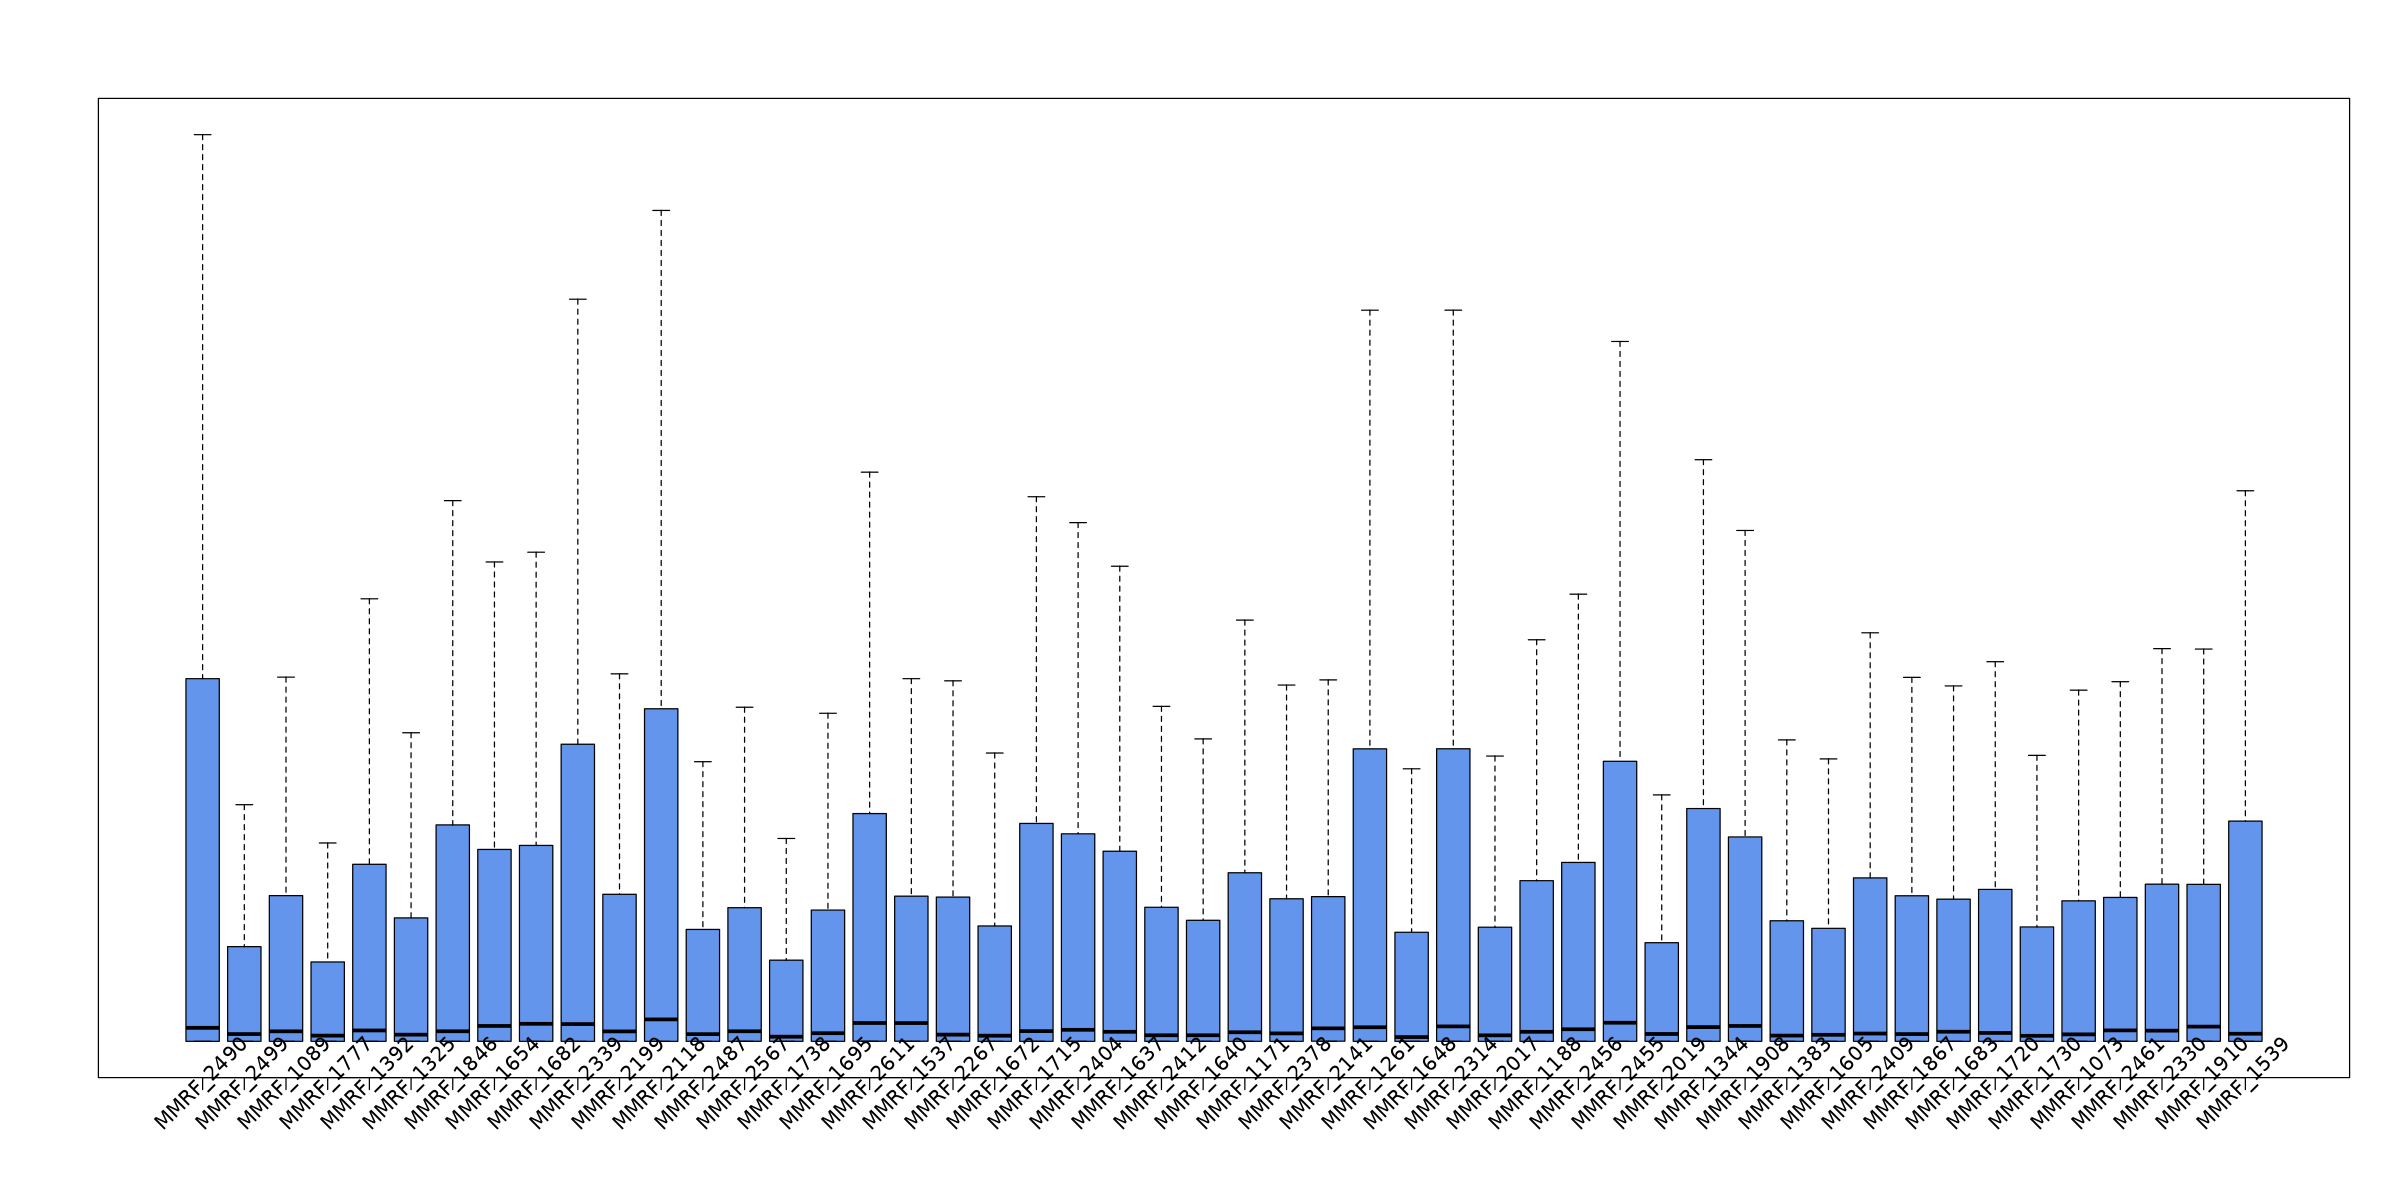

In [35]:
options(repr.plot.width=20, repr.plot.height=10)


# we organized the crowd sourced Multiple Myeloma DREAM Challenge, 
# focusing on predicting high risk, defined as disease progression 
# or death prior to 18 months from diagnosis. 



#----------------- Preprocess the input data

edata = expression_data





# make sure that I all samples that I am going to analyse 
# have also labels
colnames(edata) = gsub("_1_BM","",colnames(edata))
intersect_labels = intersect(colnames(edata),annot_data$Patient)
edata_m = edata[, match(intersect_labels, colnames(edata), nomatch = 0)]
annot_data_m = annot_data[match(intersect_labels, annot_data$Patient, nomatch = 0), ]
#sum(colnames(edata_m)==annot_data_m$Patient) == length(colnames(edata_m))

# TODO: color-code it by HR FLAF, and labels 45 degrees
bp <- boxplot(edata_m[,1:50],outline=FALSE,col="cornflowerblue", xaxt = "n", yaxt = "n")
tick <- seq_along(bp$names)
axis(1, at = tick, labels = FALSE)
text(tick, par("usr")[3] - 0.3, bp$names, srt = 45, xpd = TRUE)

#library(reshape2)
#mt = melt(edata_m[,1:50])
#ggplot(mt, aes(x = variable, y = value)) +
#  geom_boxplot()
#print(head(edata_m[,1:50]))



In [5]:
#----------------- Filtering data and scaling

# Since taking a log seems to work to tame the extreme values, 
# we do that below and also add 1 pseudo-count to be able to deal with 0 values
gexp=log10(edata_m+1)

# transpose the data set
tgexp <- t(gexp)

library(caret)
# remove near zero variation for the columns at least 85% of the values are the same
# this function creates the filter but doesn't apply it yet
nzv=preProcess(tgexp, method="nzv", uniqueCut = 15)

# apply the filter using "predict" function
# return the filtered dataset and assign it to nzv_tgexp variable
nzv_tgexp=predict(nzv,tgexp)

#anyNA(nzv_tgexp) # check if there are NA values


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




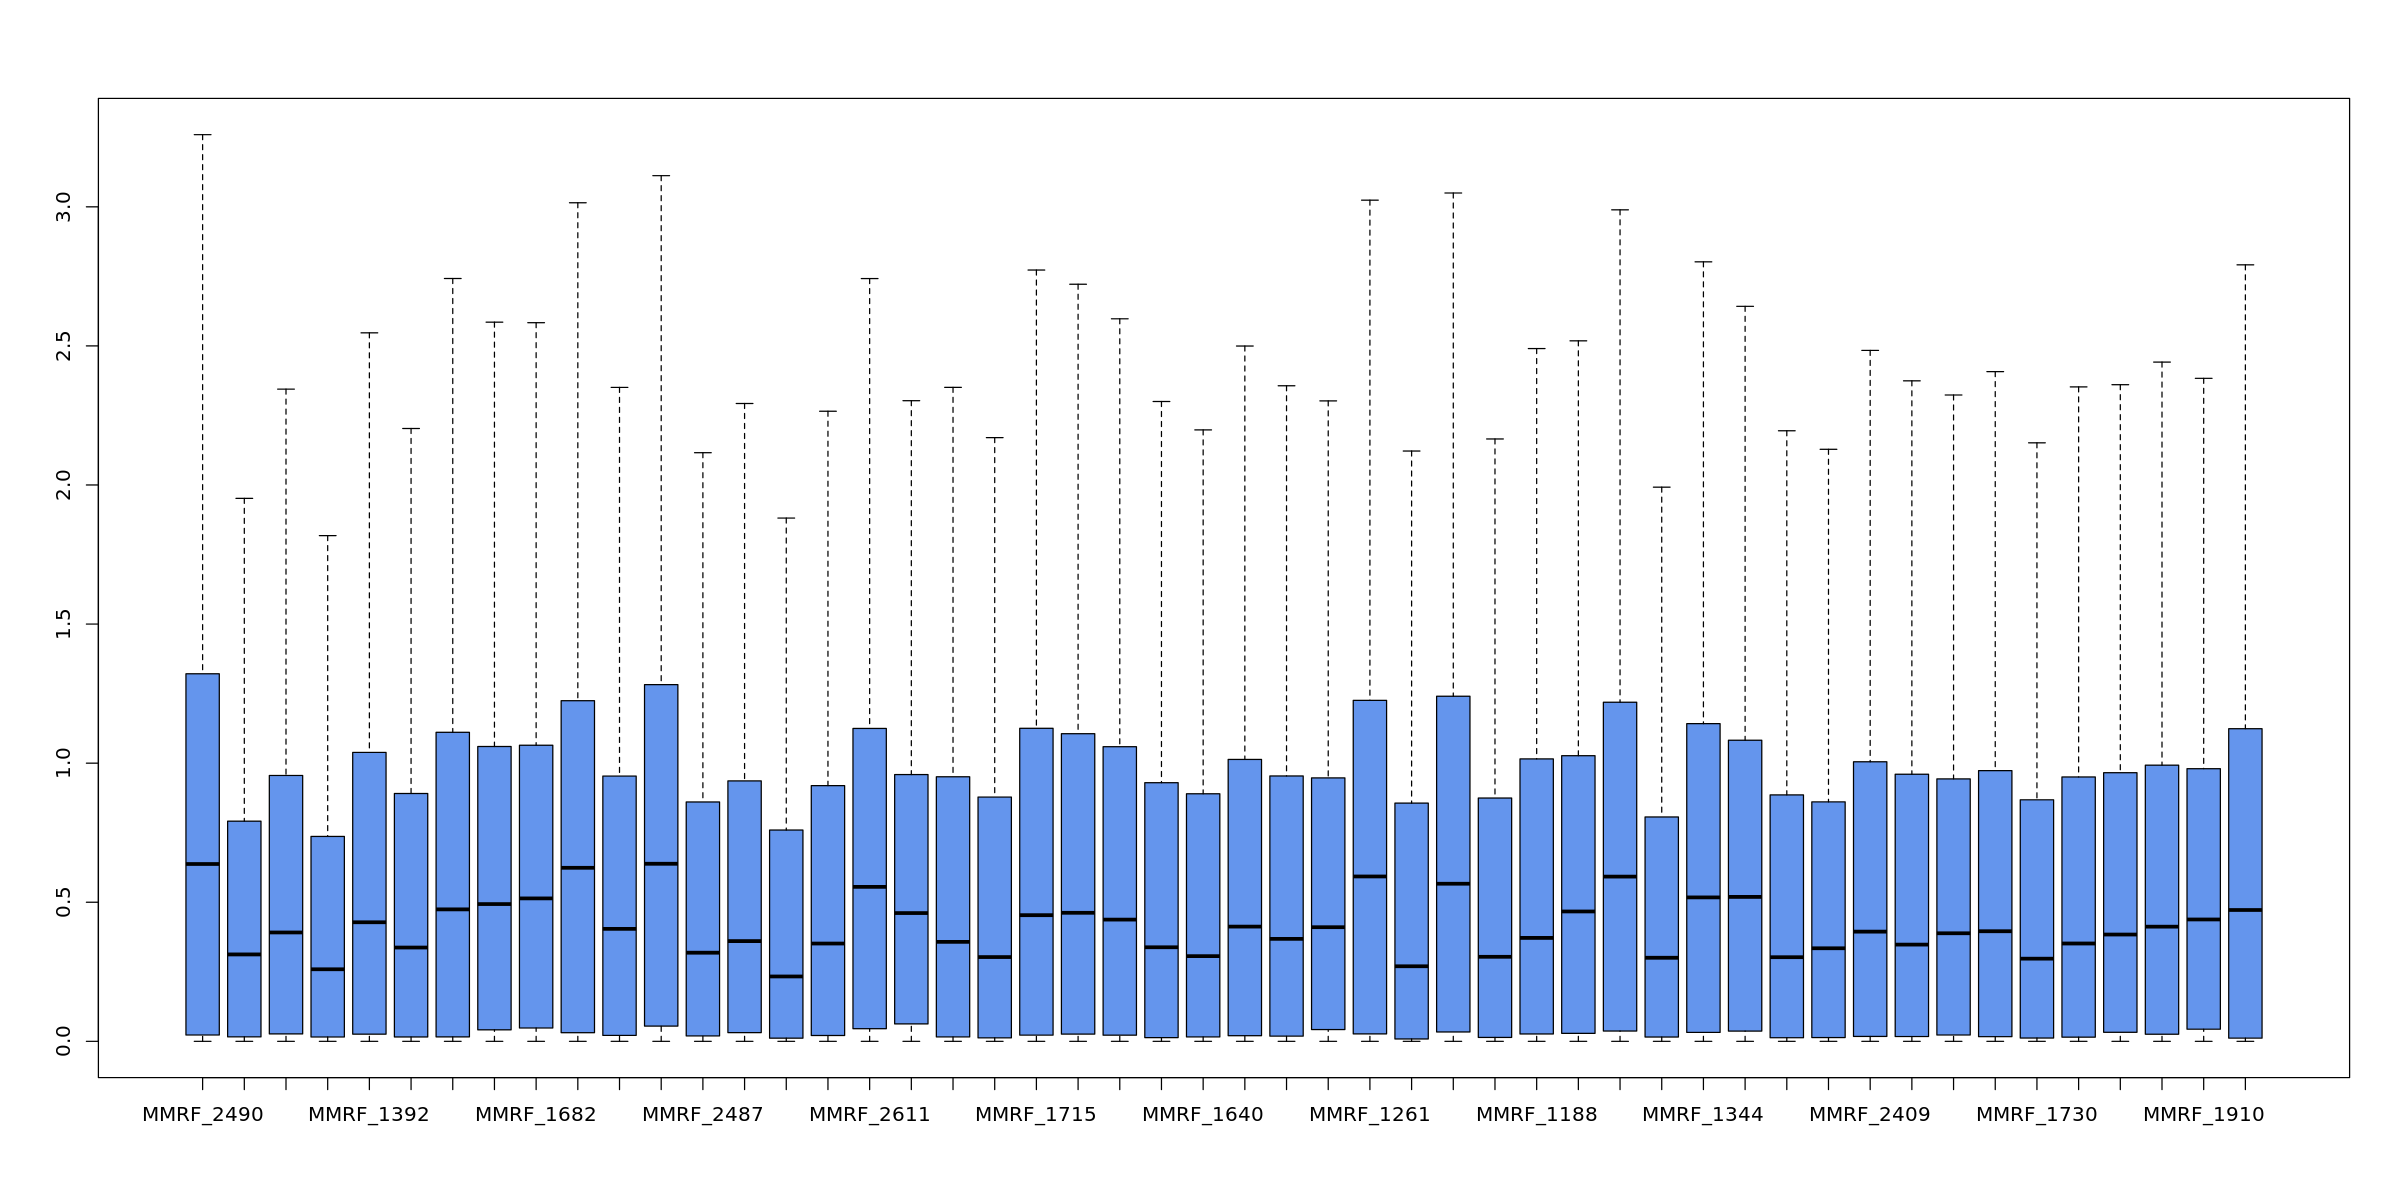

In [6]:
# check if there are NA values in the expression matrix
if(anyNA(nzv_tgexp)) print("There are NAs in the expression matrix")

# show 
nzv_gexp = t(nzv_tgexp)
boxplot(nzv_gexp[,1:50],outline=FALSE,col="cornflowerblue")



Clustering
---------------------





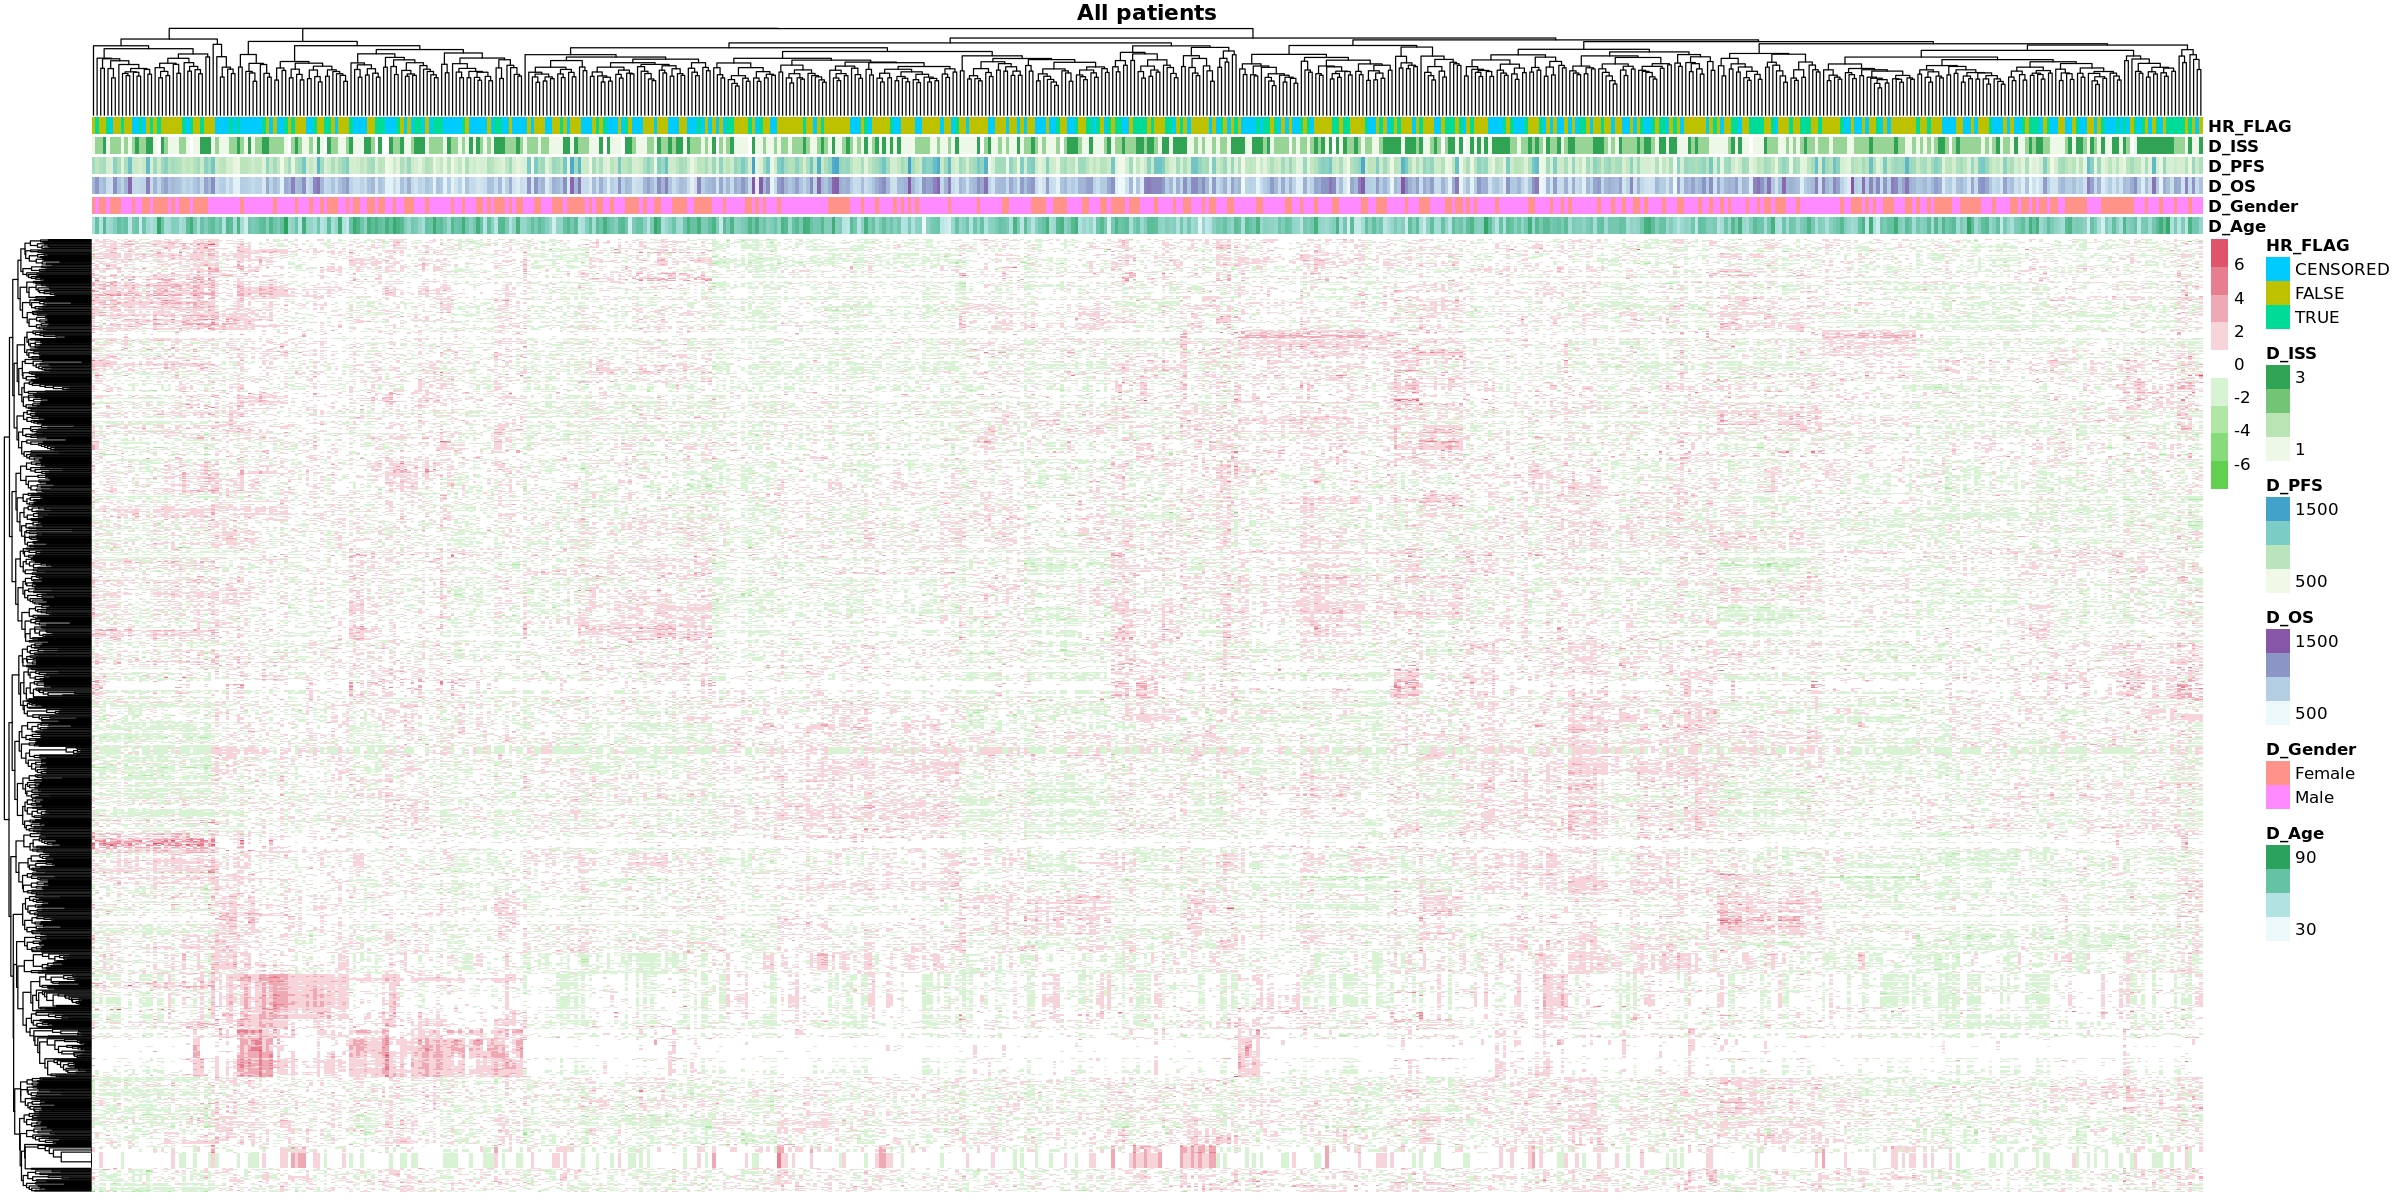

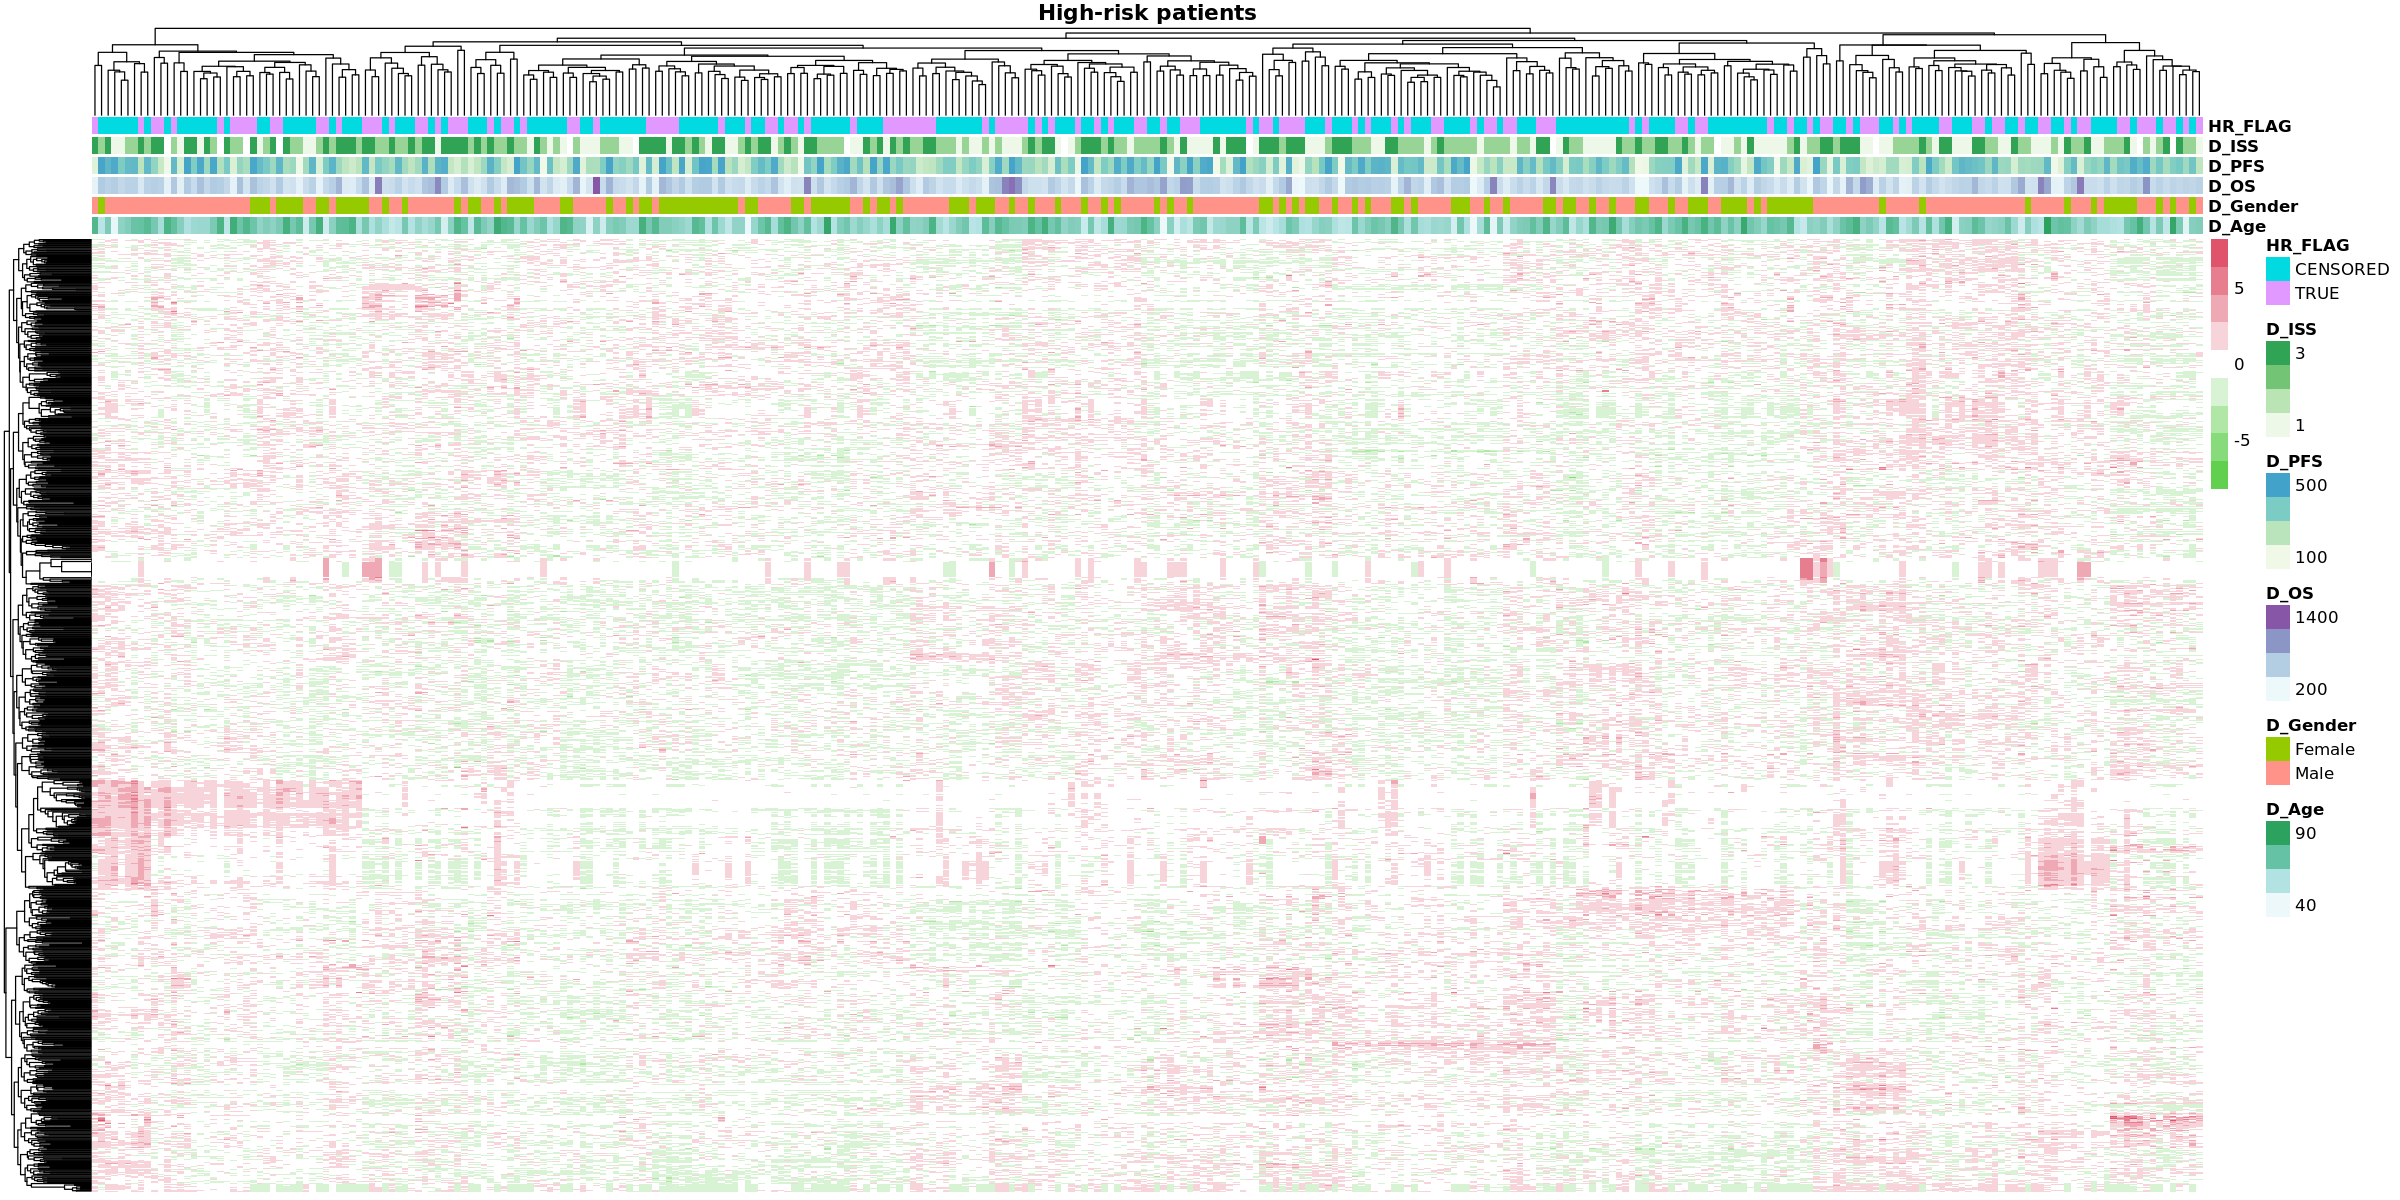

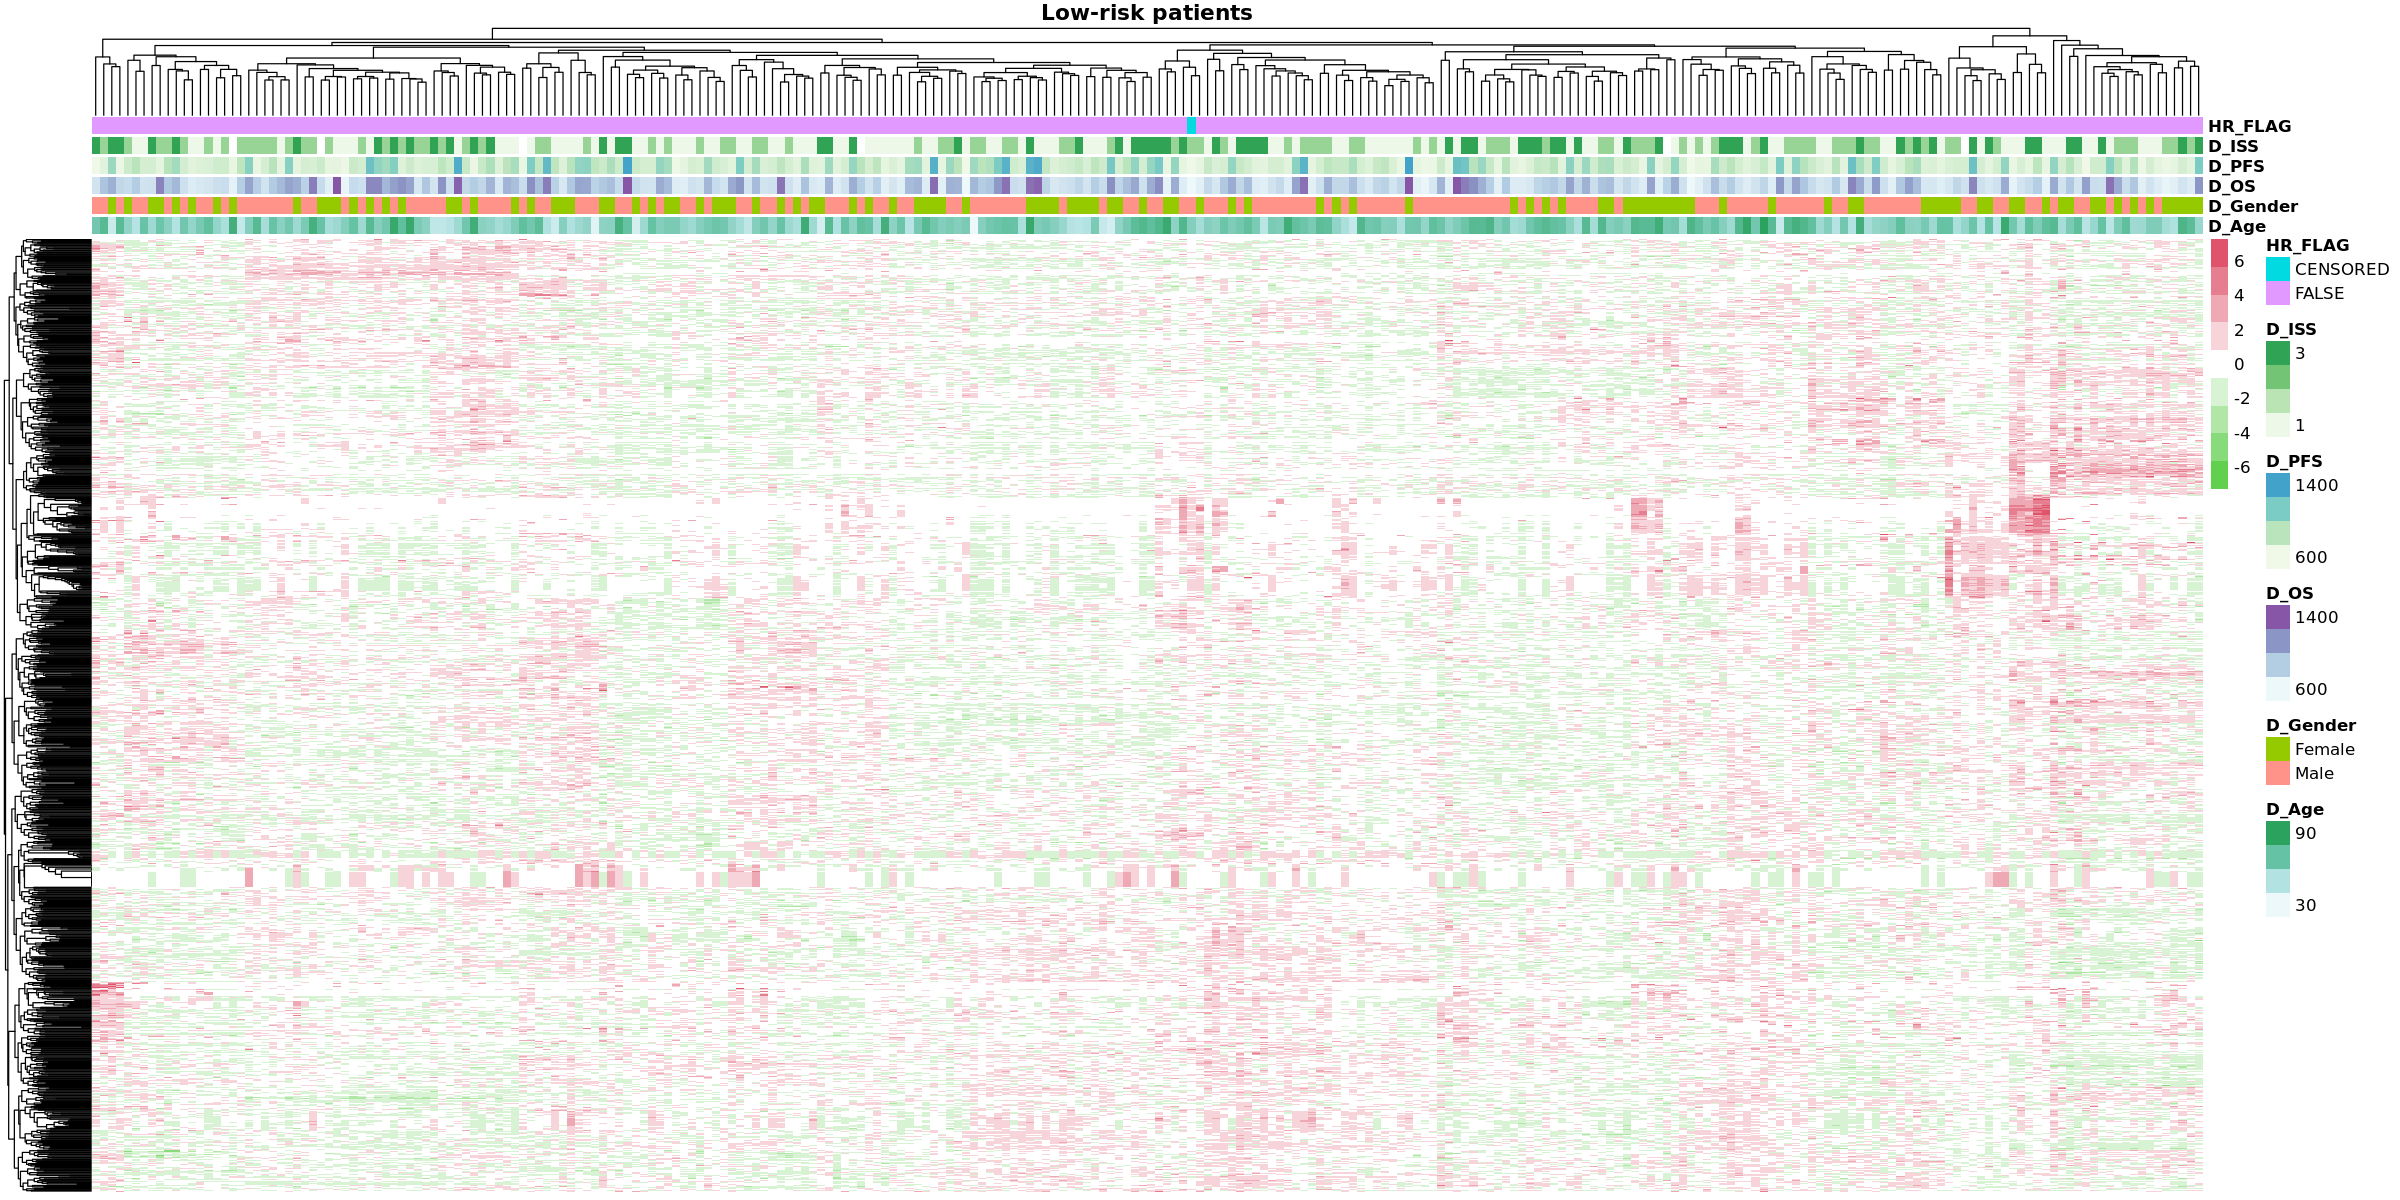

In [34]:
# Let’s select the top 1000 most variable genes among the samples.
options(repr.plot.width=20, repr.plot.height=10)


library(pheatmap)

#compute the variance of each gene across samples
V <- apply(nzv_gexp, 1, var)
#sort the results by variance in decreasing order 
#and select the top 100 genes 
selectedGenes <- names(V[order(V, decreasing = T)][1:1000])


#Now we can quickly produce a heatmap where samples and genes are clustered.
#library(pheatmap)
#pheatmap(nzv_gexp[selectedGenes,], scale = 'row', show_rownames = FALSE)


annot_sel_col <- c("D_Age", 
                   "D_Gender", 
                   "D_OS",
                   "D_PFS", 
                   "D_ISS", 
                   "HR_FLAG"
                  )
colData <- annot_data_m[which(colnames(annot_data_m) %in% annot_sel_col)]
rownames(colData) = colnames(nzv_gexp)

#print(head(nzv_gexp[selectedGenes,]))
#print(head(colData))

library(dichromat)
colramp = colorRampPalette(c(3,"white",2))(9)

pheatmap(nzv_gexp[selectedGenes,], 
         scale = 'row', 
         show_rownames = FALSE, 
         show_colnames = FALSE, 
         annotation_col = colData,
         col=colramp,
         main="All patients")


# Plot newly classified patients that relapsed or died before 18 months (including censored)
pheatmap(nzv_gexp[selectedGenes,which(colData$D_PFS<547.501)], 
         scale = 'row', 
         show_rownames = FALSE, 
         show_colnames = FALSE, 
         annotation_col = colData[which(colData$D_PFS<547.501),],
         col=colramp,
         main="High-risk patients")

pheatmap(nzv_gexp[selectedGenes,which(colData$D_PFS>=547.501)], 
         scale = 'row', 
         show_rownames = FALSE, 
         show_colnames = FALSE, 
         annotation_col = colData[which(colData$D_PFS>=547.501),],
         col=colramp,
        main="Low-risk patients")


# https://rviews.rstudio.com/2017/09/25/survival-analysis-with-r/
# https://www.biostars.org/p/344233/
# https://cran.r-project.org/web/packages/glmnet/vignettes/Coxnet.pdf
# https://compgenomr.github.io/book/gene-expression-analysis-using-high-throughput-sequencing-technologies.html
# https://medium.com/towards-data-science/five-tips-on-survival-analysis-for-a-data-scientist-ba9fd97cbb2d
# https://www.randomforestsrc.org/articles/getstarted.html
# https://bioconnector.github.io/workshops/r-survival.html#tcga
# https://rviews.rstudio.com/2017/09/25/survival-analysis-with-r/
# https://www.biostars.org/p/344233/

In [38]:
options(repr.plot.width=7, repr.plot.height=7)


# PCA
# Let’s make a PCA plot to see the clustering of replicates as a scatter plot in two dimensions 

library(stats)
library(ggfortify); library(ggplot2)
#transpose the matrix 
#M <- t(nzv_gexp[selectedGenes,])
#M <- t(nzv_gexp)

#nzv_gexp_centered2 = t(nzv_gexp) - colMeans(nzv_gexp)

# transform the counts to log2 scale 
#M <- log2(M + 1)
#compute PCA 
pcaResults <- prcomp(t(nzv_gexp), center = TRUE)

#plot PCA results making use of ggplot2's autoplot function
#ggfortify is needed to let ggplot2 know about PCA data structure.

annot_data_m$D_ISS = as.factor(annot_data_m$D_ISS)

#autoplot(pcaResults)

autoplot(pcaResults, data = annot_data_m, colour = 'D_Gender')
autoplot(pcaResults, data = annot_data_m, colour = 'D_ISS')
autoplot(pcaResults, data = annot_data_m, colour = 'D_Age')
autoplot(pcaResults, data = annot_data_m, colour = 'HR_FLAG')



ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 582, 19728


In [36]:
# Modify annotation table
y = annot_data_m
y$time = y$D_PFS
y$status = y$D_PFS_FLAG
y$high.risk <- unlist(apply(y[, c("status", "time")], 1,
                                function(row) ifelse((row[1] == 1) && (row[2] < 18*(365.25/12)), "high", "low")))


In [113]:
#print(pcaResults$)
#dim(pcaResults$x)
#print(dim(annot_data_m))


Correct gene expression data using the ComBat algorithm
------------------------------------------------

Looking at the results of the hierarchical custering and PCA above, I got inspired to remove batch effects and other unwanted variation.



In [16]:
#edata = expression_data[rowMeans(expression_data) > 100,]
# to be ona scale thats easier to work with
#edata = log2(edata + 1)
# if we dont center the data, if we dont remove rowmeans of the center, the column means of data
# then the first singual value will always be the mean level
# since that will always explain the most variation in genomics experiment
# we want to see variation between sample or between genes
#edata_centered = edata - rowMeans(edata) 
#svd1 = svd(edata_centered)
#names(svd1)

In [ ]:
# try KNN, Support Vector Machines and Ensemble Methods like Random Forests or Gradient Boosting

Baseline models: age, ISS, and age + ISS
---------------------------------------------------------

Baseline models were Cox proportional hazards models where PFS was the response variable and age, ISS, or both age and ISS were explanatory variables. Continuous risk predictions scores of each sample were thresholded to create high risk classifications. The threshold of a given model was calculated by generating sample level  predictions in the training data. The threshold was defined as the cutpoint that maximized the logrank statistic comparing above and below the threshold to their true high-risk status. Continuous predictions for validation data were computed by applying the above trained Cox proportional hazards model to them. These values were dichotomized into high and low risk according to whether the prediction was above or below, respectively, the threshold.

The baseline predictors were Cox proportional hazard models where progression free survival was modeled on age or ISS or age and ISS together. As comparators these models represent a reasonable lower bound on expected performance of high-risk classifiers. 



estimated cutpoint 
          1.333989 



	Fisher's Exact Test for Count Data

data:  y$high.risk and y$inferred.high.risk
p-value = 4.404e-05
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.2404837 0.6187949
sample estimates:
odds ratio 
 0.3846837 


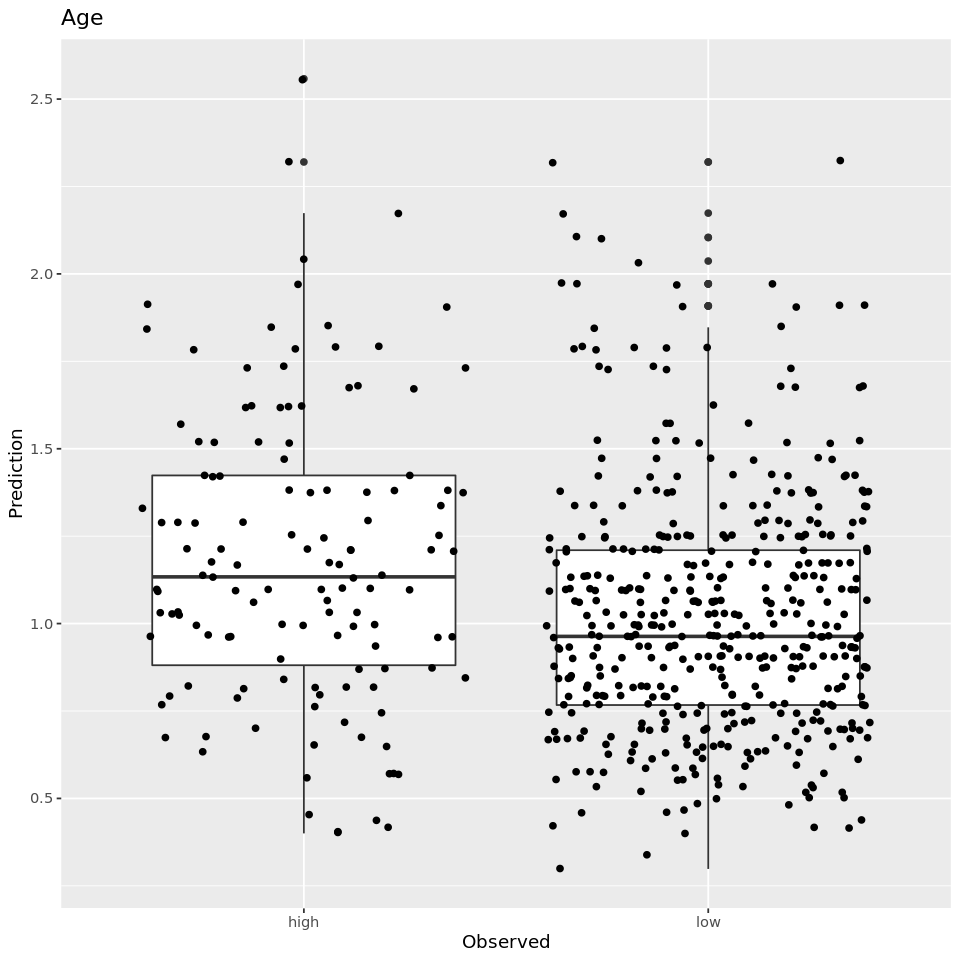

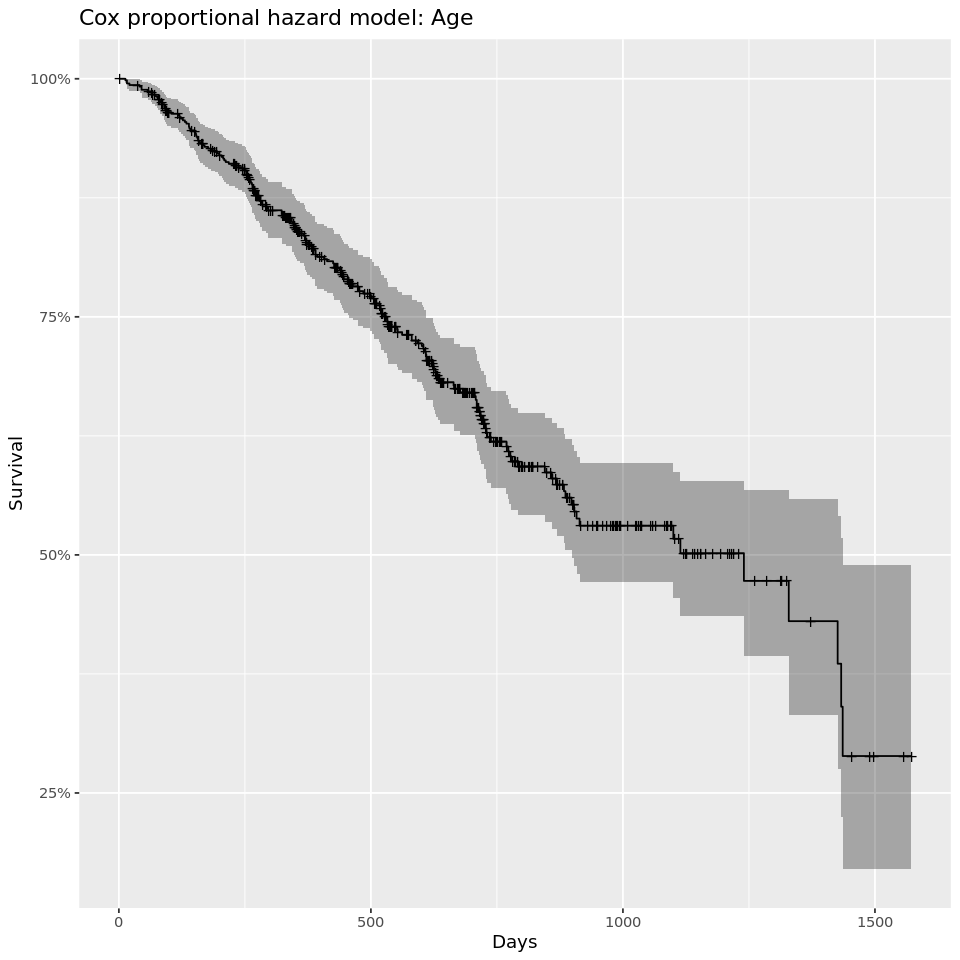

In [22]:
options(repr.plot.width=8, repr.plot.height=8)

# Here is a survival analysis based on the one of the top models, 
# I am not sure though that it works well

suppressPackageStartupMessages(library(glmnet));
suppressPackageStartupMessages(library(survival));
suppressPackageStartupMessages(library(ggplot2));
suppressPackageStartupMessages(library(maxstat))


coxph.model = function(y, clinical.covariates){

    surv.formula <- as.formula(paste("Surv(time, status)", "~",
                                     paste(clinical.covariates, collapse = " + "), sep = " "))
    cph.fit <- coxph(surv.formula, data = y)
    
    pred <- unname(predict(cph.fit, newdata = y, type = "risk"))
    y$pred <- pred

    ## Calculate a threshold for the Cox proportional hazards model                                                                                                                     
    mt.formula <- as.formula(paste("Surv(time, status)", "~", "pred", sep = " "))
    mt <- maxstat.test(mt.formula, data=data.frame(y), smethod="LogRank", pmethod="none")
    print(mt$estimate)
    
    return(
        list(y = y, 
             fitted.model = cph.fit, 
             threshold = as.numeric(mt$estimate))
        )
    
}


############## age
                            
res = coxph.model(y, "D_Age")
threshold <- res$threshold
y$pred = res$y$pred
y$inferred.high.risk <- y$pred > threshold

                            
fisher.test(y$high.risk, y$inferred.high.risk)
g <- ggplot(data = y, aes(x = high.risk, y = pred))
g <- g + geom_boxplot()  +   geom_jitter()  + ggtitle("Age") + ylab("Prediction") + xlab("Defined risk")             
g     
    
                            
cox_fit <- survfit(res$fitted.model)
#plot(cox_fit, main = "cph model", xlab="Days")
autoplot(cox_fit) + ggtitle("Cox proportional hazard model: Age") + xlab("Days") + ylab("Survival")
                            
                            

estimated cutpoint 
          1.024285 



	Fisher's Exact Test for Count Data

data:  y$high.risk and y$inferred.high.risk
p-value = 8.371e-06
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.2429097 0.5858020
sample estimates:
odds ratio 
  0.377185 


Warning message:
“Removed 20 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”


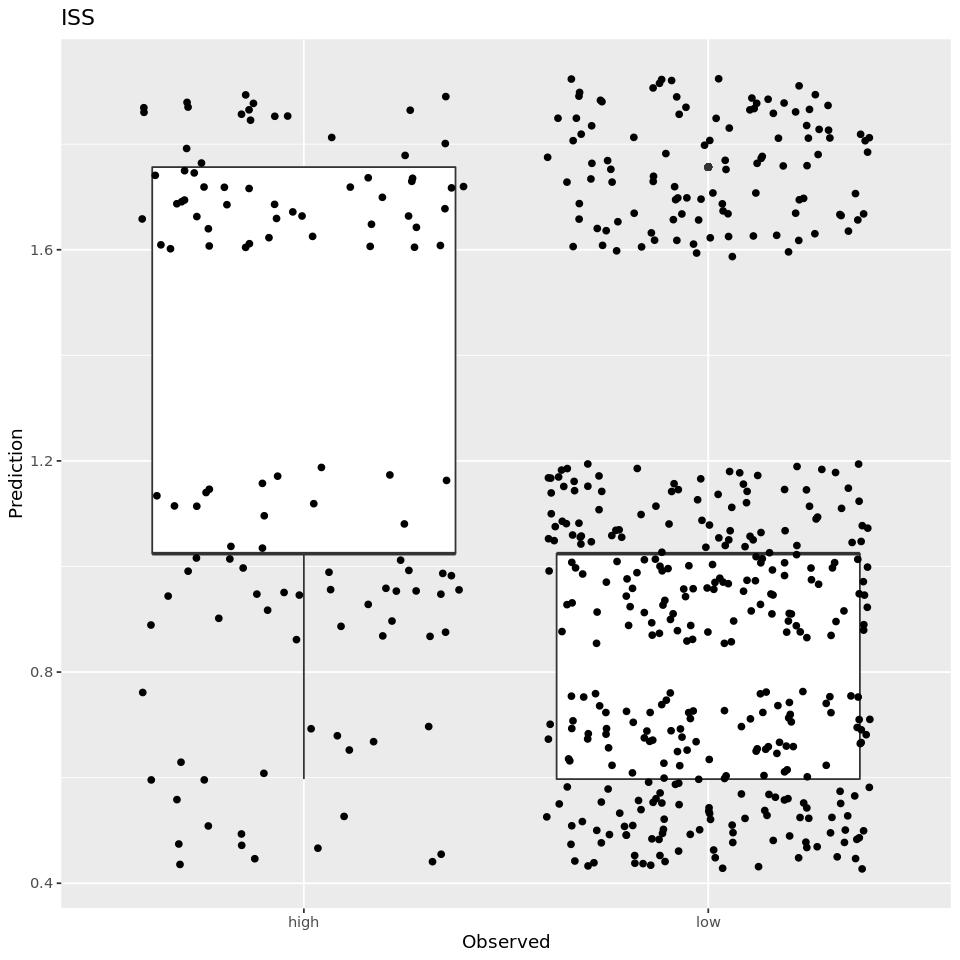

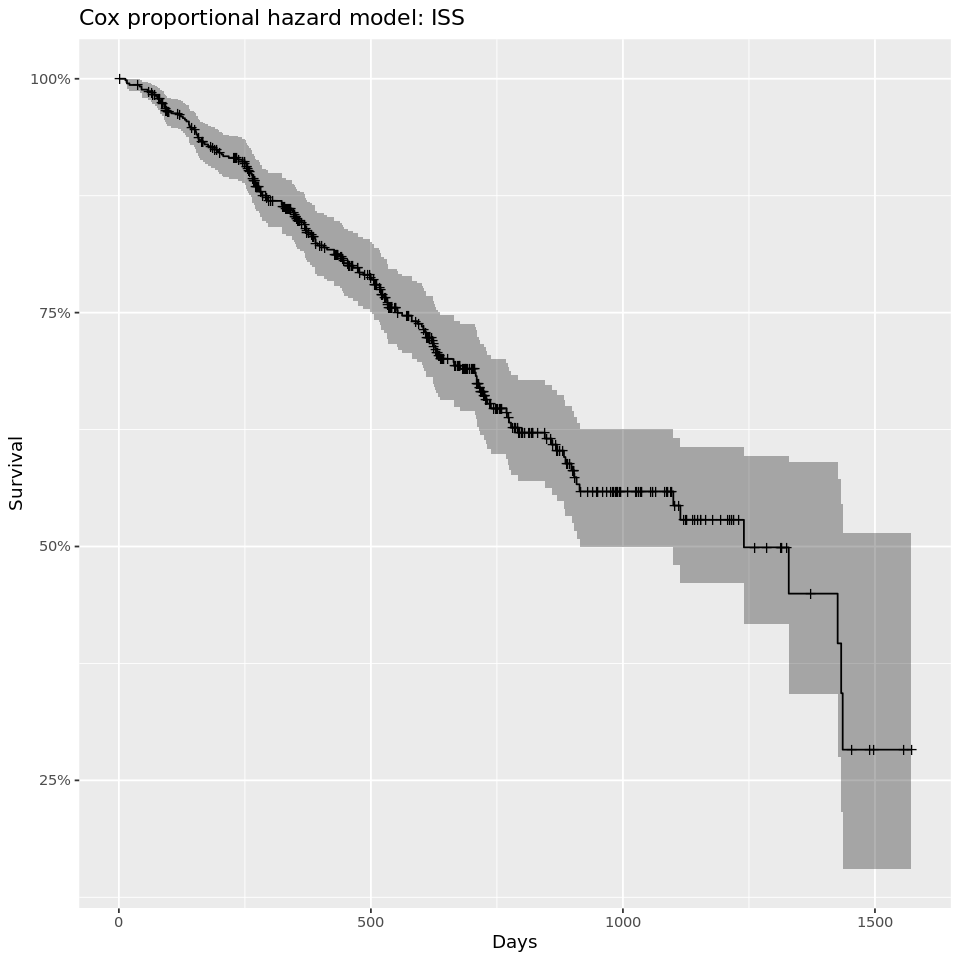

In [24]:
############## ISS
                            
res = coxph.model(y, "D_ISS")
threshold <- res$threshold
y$pred = res$y$pred
y$inferred.high.risk <- y$pred > threshold

                            
fisher.test(y$high.risk, y$inferred.high.risk)
g <- ggplot(data = y, aes(x = high.risk, y = pred))
g <- g + geom_boxplot()  +   geom_jitter()  + ggtitle("ISS") + ylab("Prediction") + xlab("Defined risk")             
g    

cox_fit <- survfit(res$fitted.model)
#plot(cox_fit, main = "cph model", xlab="Days")
autoplot(cox_fit) + ggtitle("Cox proportional hazard model: ISS") + xlab("Days") + ylab("Survival")
     
  

estimated cutpoint 
          1.175734 



	Fisher's Exact Test for Count Data

data:  y$high.risk and y$inferred.high.risk
p-value = 4.439e-08
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.2050290 0.4903631
sample estimates:
odds ratio 
 0.3180987 


Warning message:
“Removed 20 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”


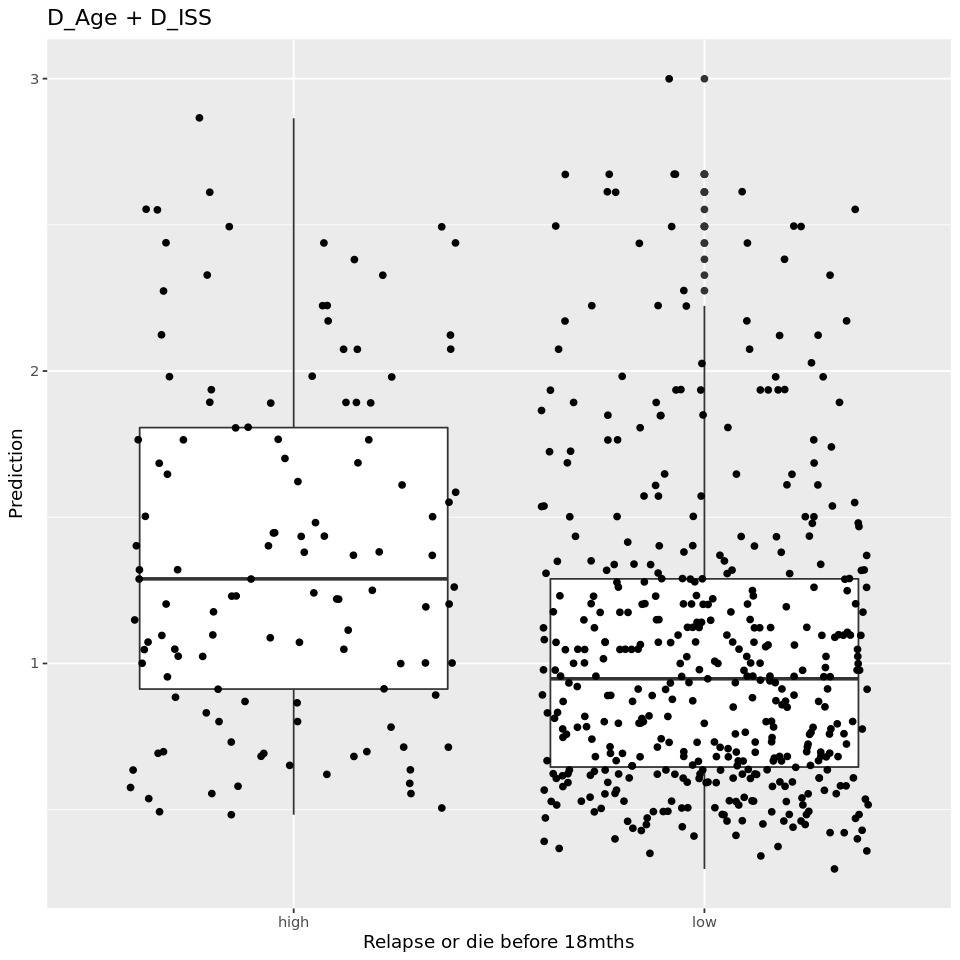

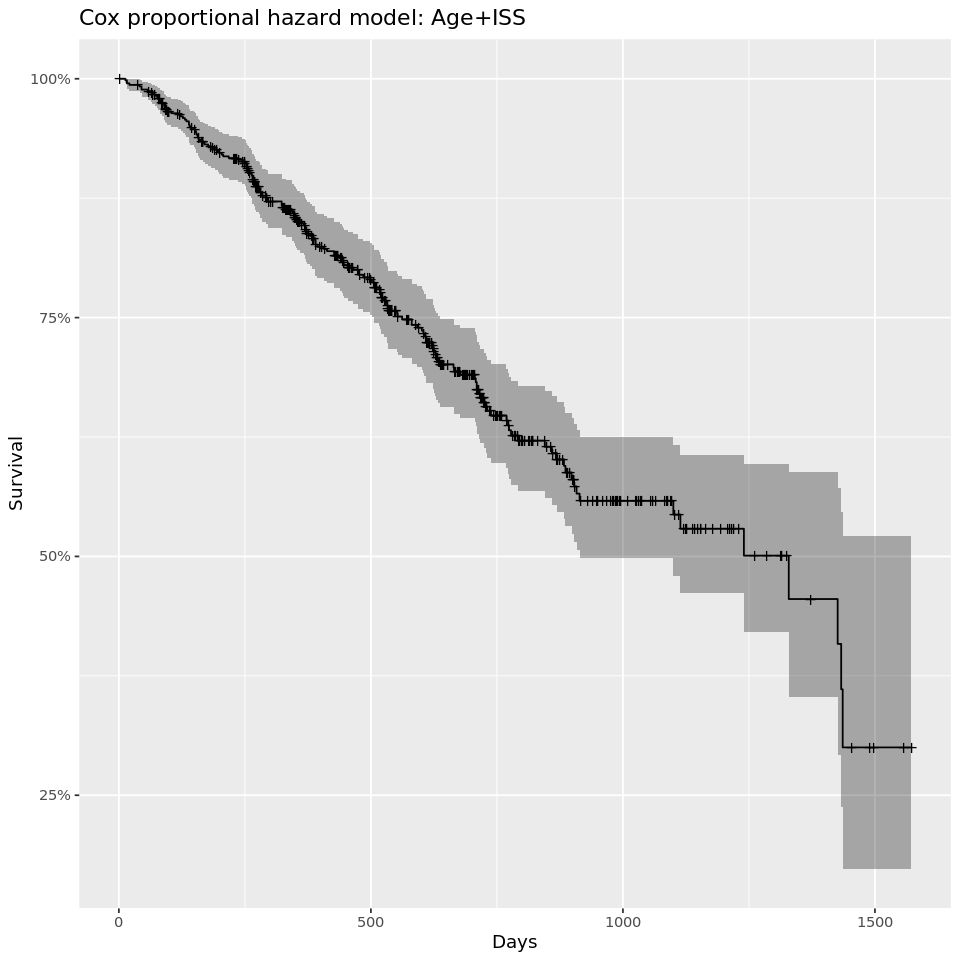

In [23]:
options(repr.plot.width=8, repr.plot.height=8)

############## age + ISS  
                            
                            
res = coxph.model(y, "D_Age + D_ISS")
threshold <- res$threshold
y$pred = res$y$pred
y$inferred.high.risk <- y$pred > threshold

                            
fisher.test(y$high.risk, y$inferred.high.risk)
g <- ggplot(data = y, aes(x = high.risk, y = pred))
g <- g + geom_boxplot()  +   geom_jitter()  + ggtitle("D_Age + D_ISS") + ylab("Prediction") + xlab("Defined risk")             
g 


cox_fit <- survfit(res$fitted.model)
#plot(cox_fit, main = "cph model", xlab="Days")
autoplot(cox_fit) + ggtitle("Cox proportional hazard model: Age+ISS") + xlab("Days") + ylab("Survival")
     

In [40]:
#------------------------- Regularized Cox Regression
library(glmnet);
library(survival);

# filter patients that
#samples_hrflag = annot_data_m$HR_FLAG==TRUE | annot_data_m$HR_FLAG=="CENSORED"

#annot_data_mfl=annot_data_m[which(samples_hrflag),]
#nzv_gexp_fl = nzv_gexp[,which(samples_hrflag)]


# x must be an n × p matrix of covariate values
#— each row corresponds to a patient and each column a covariate. y is an n × 2 matrix, with a column
#"time" of failure/censoring times, and "status" a 0/1 indicator, with 1 meaning the time is a failure
#time, and 0 a censoring time
#x_regcox <- as.matrix(t(nzv_gexp_fl))
#y_regcox <- as.matrix(data.frame(time = annot_data_mfl$D_OS,
#                       status = ifelse(annot_data_mfl$HR_FLAG==TRUE, 1, 0)
#                       ))


#library(survival)
#data(CoxExample)
#x <- CoxExample$x
#y <- CoxExample$y
#print(head(x))
#print(head(y))


#"Surv(time, status)"
#x=as.matrix(y[c("D_Age", "D_ISS")])
#x[,1] = as.numeric(x[,1])
#print(head(x))
# regularized regerssion here wont work on any character !!!!!!!!!!!!!!!!!!!!!!
#fit_regcox <- glmnet(x=y$D_Age, y=data.frame(time=y$D_PFS, status=y$D_PFS_FLAG), family = "cox")
#plot(fit_regcox)
#coef(fit, s = 0.05)
#set.seed(123)
#cvfit_regcox <- cv.glmnet(x_regcox, y_regcox, family = "cox", type.measure = "C")
#plot(cvfit_regcox)

#options(repr.plot.width=8, repr.plot.height=8)
#plot(cvfit)
#cvfit_regcox$lambda.min
#cvfit_regcox$lambda.1se
# visualize the survival curves from the model
#survival::survfit(fit_regcox, s = 0.05, x = x, y = y)

#print(survival::Surv(y_regcox))
#print(fit_regcox)
#plot(survival::survfit(fit_regcox, s = 0.05, x = x_regcox, y = survival::Surv(y_regcox)))


    D_Age D_ISS
529 "81"  "III"
532 "55"  "I"  
18  "61"  "III"
252 "67"  "I"  
103 "41"  "I"  
77  "58"  "III"


ERROR: Error in if (is.null(np) | (np[2] <= 1)) stop("x should be a matrix with 2 or more columns"): argument is of length zero


In [19]:
###############################################

# x must be an n × p matrix of covariate values
#— each row corresponds to a patient and each column a covariate. y is an n × 2 matrix, with a column
#"time" of failure/censoring times, and "status" a 0/1 indicator, with 1 meaning the time is a failure
#time, and 0 a censoring time
#x_regcox <- as.matrix(t(nzv_gexp_fl))
#y_regcox <- as.matrix(data.frame(time = annot_data_mfl$D_OS,
#                       status = ifelse(annot_data_mfl$HR_FLAG==TRUE, 1, 0)
#                       ))
#fit_regcox <- glmnet(as.matrix(x_regcox), as.matrix(y_regcox), family = "cox")
#plot(fit_regcox)
#coef(fit, s = 0.05)
#set.seed(123)
#cvfit_regcox <- cv.glmnet(x_regcox, y_regcox, family = "cox", type.measure = "C")
#plot(cvfit_regcox)

#annot_data_mfl$time = annot_data_mfl$D_OS
#annot_data_mfl$status =ifelse(annot_data_mfl$HR_FLAG==TRUE, 1, 0)

#cox <- coxph(Surv(time, status) ~ D_Age , data = annot_data_mfl)
#print(head(annot_data_mfl))

#cox_fit <- survfit(cox)
#plot(cox_fit, main = "cph model", xlab="Days")
#autoplot(cox_fit) + ggtitle("Cox proportional hazard model: age") + xlab("Days") + ylab("Survival")

Cox Proportional Hazards survival model
---------------------------------------------------------


In [52]:
# https://www.biostars.org/p/344233/

library(Biobase)
  library(GEOquery)

  # load series and platform data from GEO
  gset <- getGEO('GSE2990', GSEMatrix =TRUE, getGPL=FALSE)
  x <- exprs(gset[[1]])

  # remove Affymetrix control probes
  x <- x[-grep('^AFFX', rownames(x)),]

  # transform the expression data to Z scores
  x <- t(scale(t(x)))

  # extract information of interest from the phenotype data (pdata)
  idx <- which(colnames(pData(gset[[1]])) %in%
    c('age:ch1', 'distant rfs:ch1', 'er:ch1',
      'ggi:ch1', 'grade:ch1', 'node:ch1',
      'size:ch1', 'time rfs:ch1'))

  metadata <- data.frame(pData(gset[[1]])[,idx],
    row.names = rownames(pData(gset[[1]])))

  # remove samples from the pdata that have any NA value
  discard <- apply(metadata, 1, function(x) any( is.na(x) ))
  metadata <- metadata[!discard,]

  # filter the Z-scores expression data to match the samples in our pdata
  x <- x[,which(colnames(x) %in% rownames(metadata))]

  # check that sample names match exactly between pdata and Z-scores 
  all((colnames(x) == rownames(metadata)) == TRUE)
  ## [1] TRUE

  # create a merged pdata and Z-scores object
  coxdata <- data.frame(metadata, t(x))

  # tidy column names
  colnames(coxdata)[1:8] <- c('Age', 'Distant.RFS', 'ER',
    'GGI', 'Grade', 'Node',
    'Size', 'Time.RFS')

  # prepare phenotypes
  coxdata$Distant.RFS <- as.numeric(coxdata$Distant.RFS)
  coxdata$Time.RFS <- as.numeric(gsub('^KJX|^KJ', '', coxdata$Time.RFS))
  coxdata$ER <- factor(coxdata$ER, levels = c(0, 1))
  coxdata$Grade <- factor(coxdata$Grade, levels = c(1, 2, 3))



Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)

Found 1 file(s)

GSE2990_series_matrix.txt.gz



[1] TRUE

In [57]:
print(head(coxdata))

          Age Distant.RFS ER       GGI Grade Node Size Time.RFS  X1007_s_at
GSM65752   40           0  0   2.48005     3    0  1.2     2280  0.61091071
GSM65753   46           0  1 -0.633592     1    0  1.3     2675  0.66320599
GSM65754 KJ67           1  1  -1.02972     1    0    6      426  0.39016262
GSM65755   41           1  1   1.04395     3    0  3.3      182 -0.01019652
           X1053_at   X117_at   X121_at X1255_g_at    X1294_at  X1316_at
GSM65752  0.8032178 0.9576007 0.3236762 0.20730041 -0.57647252 0.5170007
GSM65753  0.1252538 0.4033209 0.1810776 0.08599057  0.43754667 0.5622666
GSM65754 -0.2412419 0.4739672 0.4422982 0.24498162  0.01942667 0.8180497
GSM65755  0.7879028 0.3364908 0.2314423 0.04583503 -0.62393026 0.3874972
          X1320_at X1405_i_at    X1431_at  X1438_at   X1487_at  X1494_f_at
GSM65752 0.6081503 -0.1140645 -0.47294071 1.3639192 0.09312675 0.002945337
GSM65753 0.7636736 -0.1623582 -0.07611515 0.5690590 0.33722956 0.090570223
GSM65754 0.6857645 -0.4058863 

In [53]:
  library(survival)
  library(RegParallel)

  res <- RegParallel(
    data = coxdata,
    formula = 'Surv(Time.RFS, Distant.RFS) ~ [*]',
    FUN = function(formula, data)
      coxph(formula = formula,
        data = data,
        ties = 'breslow',
        singular.ok = TRUE),
    FUNtype = 'coxph',
    variables = colnames(coxdata)[9:ncol(coxdata)],
    blocksize = 2000,
    cores = 2,
    nestedParallel = FALSE,
    conflevel = 95)
  res <- res[!is.na(res$P),]
  res


#  library(survminer)
#  ggsurvplot(survfit(Surv(time, status) ~ D_Age,
#    data = annot_data_mfl),
#    data = annot_data_mfl,
#    risk.table = TRUE,
#    pval = TRUE,
#    break.time.by = 500,
#    ggtheme = theme_minimal(),
#    risk.table.y.text.col = TRUE,
#    risk.table.y.text = FALSE)

Loading required package: doParallel

Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: iterators

Loading required package: parallel

Loading required package: arm

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:dplyr’:

    select


Loading required package: lme4


arm (Version 1.13-1, built: 2022-8-25)


Working directory is /root/projects/owkin



##############################
#RegParallel
##############################


System is:

-- Linux

Blocksize:

-- 2000

Cores / Threads:

-- 2

Terms included in model:

-- Time.RFS

-- Distant.RFS

First 5 formulae:

-- Surv(Time.RFS, Distant.RFS) ~ X1007_s_at

-- Surv(Time.RFS, Distant.RFS) ~ X1053_at

-- Surv(Time.RFS, Distant.RFS) ~ X117_at

-- Surv(Time.RFS, Distant.RFS) ~ X121_at



Variable     Term         Beta          StandardError Z            
1     X1007_s_at   X1007_s_at    0.378063999  0.3535022      1.06948119  
2     X1053_at     X1053_at      0.117739881  0.2275041      0.51752853  
3     X117_at      X117_at       0.626503679  0.6763106      0.92635499  
4     X121_at      X121_at      -0.613812627  0.6166626     -0.99537832  
5     X1255_g_at   X1255_g_at   -0.204329783  0.3983930     -0.51288494  
6     X1294_at     X1294_at     -0.116252796  0.3339704     -0.34809307  
7     X1316_at     X1316_at     -0.485412901  0.6525448     -0.74387669  
8     X1320_at     X1320_at     -0.381061627  0.5744747     -0.66332185  
9     X1405_i_at   X1405_i_at   -0.072160129  0.1951505     -0.36976656  
10    X1431_at     X1431_at     -0.070209132  0.2385297     -0.29434127  
11    X1438_at     X1438_at      0.179282584  0.3096293      0.57902337  
12    X1487_at     X1487_at     -0.162399693  0.4931842     -0.32928809  
13    X1494_f_at   X1494_f_at   -0.248571391  0.2915314     -0.85264023  
14    X1598_g_at   X1598_g_at   -0.413705215  0.4393253     -0.94168303  
15    X160020_at   X160020_at   -0.196953879  0.3873067     -0.50852169  
16    X1729_at     X1729_at      0.249835353  0.4442214      0.56241182  
17    X1773_at     X1773_at     -0.251437431  0.4687872     -0.53635731  
18    X177_at      X177_at      -0.422552289  0.5220664     -0.80938425  
19    X179_at      X179_at      -0.057893159  0.3844374     -0.15059191  
20    X1861_at     X1861_at     -0.230058619  0.2827888     -0.81353509  
21    X200000_s_at X200000_s_at -0.509297974  0.3559867     -1.43066565  
22    X200001_at   X200001_at   -0.069153515  0.2807479     -0.24631886  
23    X200002_at   X200002_at    0.147897566  0.2089999      0.70764424  
24    X200003_s_at X200003_s_at  0.123771932  0.1749120      0.70762390  
25    X200004_at   X200004_at    0.497799788  0.2944748      1.69046642  
26    X200005_at   X200005_at   -0.013446439  0.3261303     -0.04123027  
27    X200006_at   X200006_at   -0.532965950  0.3306508     -1.61186963  
28    X200007_at   X200007_at    0.008319668  0.1614964      0.05151612  
29    X200008_s_at X200008_s_at -0.044112682  0.1958375     -0.22525144  
30    X200009_at   X200009_at    0.061295297  0.1701135      0.36031995  
⋮     ⋮            ⋮            ⋮             ⋮             ⋮            
22186 X65770_at    X65770_at     0.2747845277 0.5641079      0.4871134353
22187 X65884_at    X65884_at     0.0322920789 0.3228206      0.1000310252
22188 X66053_at    X66053_at    -0.0309141178 0.3193065     -0.0968164393
22189 X71933_at    X71933_at    -0.8270613975 0.7929774     -1.0429822947
22190 X74694_s_at  X74694_s_at   0.0345739901 0.2607473      0.1325957762
22191 X76897_s_at  X76897_s_at  -0.1162106454 0.4186005     -0.2776170767
22192 X77508_r_at  X77508_r_at  -0.2575369621 0.4158240     -0.6193413392
22193 X78047_s_at  X78047_s_at  -0.0778202129 0.3350101     -0.2322921596
22194 X78330_at    X78330_at    -0.4531980772 0.7999599     -0.5665259712
22195 X78383_at    X78383_at    -0.9631989446 0.7465942     -1.2901238149
22196 X78495_at    X78495_at    -0.2506315397 0.4494786     -0.5576050687
22197 X79005_at    X79005_at    -0.4985411224 0.7074779     -0.7046737776
22198 X81737_at    X81737_at    -0.8388228266 0.8430040     -0.9950401145
22199 X81811_at    X81811_at     0.2628241036 0.3071284      0.8557466838
22200 X823_at      X823_at       0.3251980449 0.2545485      1.2775486321
22201 X87100_at    X87100_at     0.0622540525 0.2161393      0.2880274024
22202 X89476_r_at  X89476_r_at  -0.6168072843 0.5488452     -1.1238274341
22203 X89948_at    X89948_at    -0.6044810312 0.6446199     -0.9377324442
22204 X89977_at    X89977_at    -0.3996799390 0.4547703     -0.8788611304
22205 X90265_at    X90265_at    -0.2970909199 0.4263496     -0.6968245905
22206 X90610_at    X90610_at    -0.5014989222 0.5179967     -0.9681508003
22207 X91580_at    X91580_at    -0.4460256999 0.5013461     -0.8896563323
22208 X916

Classification via logistic regression
----------------------------------------


In [ ]:
# Its a top performing method

# The RNA-Seq data was first normalized using log transformation, 
# and both the microarray and RNA-Seq data were next standardized using z-scores for all genes.


# 1) genes mapped to certain pathways and chromosomal abnormalities
#    I. Chromosomal abnormalities [3]: deletion of chromosome 1p, 
#                                        gain of chromosome 1q, 
#                                        gain of chromosome 9, 
#                                        deletion of chromosome 13q, 
#                                        deletion of chromosome 17p, 
#                                        translocation t(4;14), 
#                                        trainslocation t(11;14), 
#                                        translocation t(14;16/14;20).
#    II. DNA repair pathways [5]: non-homologous end-joining pathway
#                                 homologous recombination pathway, 
#                                 Fanconi anemia pathway, 
#                                 nucleotide excision repair pathway, 
#                                 mismatch repair pathway, 
#                                 base excision repair pathway.
#    III. Other pathways [3]: cell cycle pathway, 
#                              p53 signalling pathway, 
#                              NF-kB signalling pathway, 
#                              Ras-ERK pathway.
#    IV. Genes targeted by Multiple Myeloma treatments [6]: Bortezomib, Thalidomide -> AURKA, IGF1,  AURKA (3), IGF1R (5), and FGFR3
#    V. Mutations associated with high-risk Multiple Myeloma [3].
#    VI. Other gene expression profiles obtained from literature: EMC92 [7], UAMS70 [8], 
#                       DNA repair pathway score [4], -> BUB1, BUB1B|PAK6, RAD51, PLK1, BRCA1, CENPA, BARD1, AURKA, MAD2L1, CENPH, XRCC2 and CDC25C|FAM53C)
#                       IFM group [9], -> TP53 
#                       cell death network [10].
# 2) gene assocaited with myeloma

# Sum of gene expressions were used, and feature selection of the engineered features 
# was also performed to progressively discard uninformative features. 
# We also include clinical data comprising age and ISS as features.


# Samples with missing data were discarded for the training dataset, 
# and only genes that were found across all training and validation datasets were retained. 
# To minimize the problem of class imbalance in training, random undersampling was performed to 
# ensure equal class distribution between high-risk and low-risk samples in the training dataset. 
# The machine learning algorithm chosen for the construction of the final prediction model was regularized 
# logistic regression, implemented using the glmnet package[11] in R. Five-fold cross-validation was simulated 
# 100 times to estimate prediction model performance. The final model was comprised of one regularized logistic 
# regression model trained on a balanced training dataset, classifying between high-risk and low-risk 
# Multiple Myeloma.


A univariate approach to rank gene for feature selection in building expression based models
------------------------------------------------------------------

In [75]:
# Second Place Feature Selection Methods

# a simple univariate approach to rank gene for feature selection in building expression based models.
# In each of the four training datasets they computed each gene’s effect size, z, via the concordance
# index between overall survival and the gene’s expression. These effect sizes were then combined across
# training sets using Stouffer’s method with no weighting to yield a single meta-z per gene. They employed
# this meta concordance index method under two expression normalization procedures with CDKN3 and PHF19 
# coming out on top respectively and combined them with clinical features to create their model.
# For more information on SUGO’s model please see their full description in Synapse
# (https://www.synapse.org/#!Synapse:syn10380508/wiki/499377)


# https://www.biostars.org/p/344233/
# test each gene independently via Cox regression

  library(survival)
  library(RegParallel)


annot_df = annot_data_m[,c("D_PFS","D_OS_FLAG")]
colnames(annot_df) = c("time", "status")
coxdata <- cbind(annot_df, t(nzv_gexp))
head(coxdata)

res_featuresel <- RegParallel(
    data = coxdata,
    formula = 'Surv(time, status) ~ [*]',
    FUN = function(formula, data)
      coxph(formula = formula,
        data = data,
        ties = 'breslow',
        singular.ok = TRUE),
    FUNtype = 'coxph',
    variables = colnames(coxdata)[3:ncol(coxdata)],
    blocksize = 2000,
    cores = 2,
    nestedParallel = FALSE,
    conflevel = 95)



#res <- res[!is.na(res$P),]
#res







time status 1         2          3           9         14       15        
529   91 1      1.2876092 0.03586829 0.000000000 0.6088853 1.897394 0.29066622
532  304 0      1.2092200 1.15271631 0.000000000 0.2561585 1.229526 0.09195663
18   881 0      0.6055604 0.44758591 0.000000000 0.1459316 1.249785 0.17326700
252  750 0      1.4224503 0.95313703 0.000000000 0.3294752 1.193723 0.10588573
103  769 1      1.4946193 0.22350009 0.004389781 0.1970834 1.472598 0.51083712
77  1082 0      1.3290295 0.29594647 0.000000000 0.3610305 1.422879 0.14781169
    16       18         ⋯ 84976     8509      86614       8778        8926    
529 2.055153 0.21873318 ⋯ 1.1321420 1.1210473 0.000000000 0.005422345 1.700818
532 1.483992 0.13023757 ⋯ 0.4890184 0.6460129 0.000000000 0.094389538 1.432696
18  1.451644 0.36934204 ⋯ 0.6735971 0.8109570 0.009419791 0.018131300 1.236384
252 1.476355 0.07855469 ⋯ 0.2947122 0.5927500 0.000000000 0.009928100 1.179059
103 1.542083 0.46871795 ⋯ 0.5617038 0.9499513 0.006047097 0.034850159 1.826172
77  1.879164 0.18455005 ⋯ 0.4212812 0.8712472 0.000000000 0.036663382 1.539953
    9570      9692      9720      9768       9797     
529 1.6864251 1.0959629 0.3535171 1.21713993 1.0212261
532 0.8859715 0.3324576 0.3363616 0.21628268 0.5583701
18  1.0259396 0.4770535 0.3711975 0.68850000 0.9195848
252 1.0282221 0.4548912 0.4895294 0.19719988 0.4889252
103 1.4155946 0.4563452 1.6986299 0.25076401 0.9889839
77  1.1635714 0.4284803 0.9884991 0.02298414 0.7091864


##############################
#RegParallel
##############################


System is:

-- Linux

Blocksize:

-- 2000

Cores / Threads:

-- 2

Terms included in model:

-- time

-- status

First 5 formulae:

-- Surv(time, status) ~ 1

-- Surv(time, status) ~ 2

-- Surv(time, status) ~ 3

-- Surv(time, status) ~ 9

-- Surv(time, status) ~ 14



ERROR: Error in {: task 1 failed - "invalid model formula in ExtractVars"


In [82]:
library(biomaRt)
mart <- useMart(dataset="hsapiens_gene_ensembl",biomart='ensembl')
gene_names = biomaRt::select(mart, keys=as.character(rownames(expression_data)),
                             columns=c('hgnc_symbol'), 
                             keytype='entrezgene_id')
entrezgene_ids = as.character(rownames(expression_data))
hgnc_symbol_ids = gene_names$hgnc_symbol
#rownames(expression_data) = hgnc_symbol_ids


In [85]:
head(entrezgene_ids)
head(hgnc_symbol_ids)
length(entrezgene_ids)
length(hgnc_symbol_ids)
sum(length(hgnc_symbol_ids) == length(entrezgene_ids))

[1] "1"  "2"  "3"  "9"  "10" "13"

[1] "A1BG" "NAT2" "ADA"  "CDH2" "CDH3" "CDH4"

[1] 24128

[1] 22813

[1] 0

In [81]:
surv.formula <- as.formula(paste("Surv(time, status)", "~","1", sep = " "))
print(surv.formula)
cph.fit <- coxph(surv.formula, data = coxdata)
head(cph.fit)

Surv(time, status) ~ 1


$loglik
[1] -571.3155

$linear.predictors
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

$residuals
        529         532          18         252         103          77 
 0.96961204 -0.12053721 -0.24829538 -0.22314463  0.76865865 -0.27666560 
        285         203         214         472         411         389 
-0.22314463  0.97693813  0.88181021 -0.03409171 -0.18320750 -0.18320750 
        526         560         240         220         580         151 
-0.03223298 -0.08069356  0.96776702 -0.12291251 -0.08485158 -0.24829538 
        441         211         227         491         193         494 
-0.14431159 -0.21595039 -0.08485158  0.91514842 -0.21595039 -0.06461874 
        195          33         484         394          52         200 
-0.24829538 -0.30444338 -0.14431159 -0.18320750  0.79508774 -0.01408483 
        461         350          38         511         510         352 
 0.96590829  0.93340497 -0.30444338 -0.12795729  0.90665087 -0.19547640 
         83         313          99         181         493         297 
-0.27666560 -0.21595039 -0.27666560 -0.24829538 -0.15293233 -0.21020326 
        215         230         235          12         515         468 
-0.20491226  0.98413581 -0.18716007 -0.30444338 -0.12291251 -0.15293233 
        314         153         362          17         413         250 
 0.95648839 -0.24829538 -0.18716007 -0.30444338  0.91092899 -0.21595039 
        549         305         170         130         332         261 
-0.02306187 -0.20491226 -0.24829538 -0.27666560 -0.13873278 -0.21020326 
         89         309          55         541         471          15 
-0.15907708 -0.16890342 -0.30444338 -0.09334913 -0.15293233 -0.19547640 
        296         108          44         267          53         581 
-0.22314463 -0.27666560 -0.20491226  0.77685537 -0.30444338 -0.08907101 
        133         321         378         575         274         221 
 0.94119522 -0.21020326 -0.19547640 -0.08907101 -0.21020326 -0.24829538 
        545         232         292          71          36         343 
-0.12291251 -0.18716007 -0.21595039 -0.30444338  0.72333440 -0.02125027 
        184         367         298         137         174          11 
-0.24829538 -0.07863595 -0.21595039 -0.27666560 -0.24829538  0.82407869 
        277         504         475         283         186         467 
-0.16890342 -0.12540627 -0.14431159 -0.22314463 -0.24829538 -0.15293233 
        513         260         262         420         159         142 
-0.12540627 -0.22314463 -0.22314463  0.90119472 -0.21020326 -0.24829538 
        537         377         353         115         576         548 
-0.09989937  0.92742881 -0.19547640 -0.24829538  0.00000000 -0.12291251 
        490         473         190          78         45

In [57]:
#head(annot_data_m)
annot_df = annot_data_m[,c("D_PFS","D_OS_FLAG", "D_Age", "D_ISS")]
colnames(annot_df) = c("time", "status", "age", "ISS")
coxdata <- cbind(annot_df, t(edata_m))
colnames(coxdata) = as.character(colnames(coxdata))
head(coxdata)

time status age ISS 1        2          3         9        10 13 ⋯
529   91 1      81  III 18.39140  0.0860962 0.0000000 3.063360 0  0  ⋯
532  304 0      55  I   15.18900 13.2140000 0.0000000 0.803676 0  0  ⋯
18   881 0      61  III  3.03237  1.8027600 0.0000000 0.399367 0  0  ⋯
252  750 0      67  I   25.45150  7.9771200 0.0000000 1.135380 0  0  ⋯
103  769 1      41  I   30.23340  0.6730160 0.0101591 0.574285 0  0  ⋯
77  1082 0      58  III 20.33190  0.9767260 0.0000000 1.296310 0  0  ⋯
    84976     8509      86614      8778       8926     9570      9692     
529 12.556325 12.214395 0.00000000 0.01256368 49.21323 47.576376 11.472770
532  2.083318  3.426016 0.00000000 0.24276650 26.08293  6.690800  1.150095
18   3.716254  5.470785 0.02192681 0.04263260 16.23390  9.615479  1.999532
252  0.971116  2.915164 0.00000000 0.02312360 14.10285  9.671416  1.850304
103  2.645053  7.911510 0.01402134 0.08355300 66.01500 25.037217  1.859862
77   1.638039  6.434422 0.00000000 0.08808640 33.66994 13.573754  1.682133
    9720      9768       9797    
529  1.256925 15.4869350 9.500890
532  1.169509  0.6454424 2.617180
18   1.350701  3.8809010 7.309690
252  2.086949  0.5747075 2.082657
103 48.960855  0.7814105 8.749535
77   8.738658  0.0543484 4.119015

Survival modelling using Random Forest and Gradient Boosting
------------------------------------------------------------

In [ ]:
sessionInfo()